In [1]:
# Import required packages
import sys
# !{sys.executable} -m pip install tqdm seaborn 
from glob import glob
import numpy as np
import joblib
import os
import pandas as pd
import json

import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from tqdm.notebook import tqdm
import seaborn as sns
from collections import Counter

# Split data if not already made

In [3]:
trainsize=[ 0.1,0.3, 0.5, 0.7,0.8]

In [2]:
# with open("/Users/grierjones/qregress/function-calc-test/quadratic/quadratic_train.bin",'rb') as f:
#     traindata=joblib.load(f)



# for ts in trainsize:
#     X_train, _, y_train, _ = train_test_split(traindata['X'],traindata['y'], train_size=int(ts*100),test_size=None,random_state=42)
#     savedata={'X':X_train,'y':y_train}
#     with open(f"/Users/grierjones/qregress/function-calc-test/quadratic/{ts}_quadratic_train.bin",'wb') as f:
#         joblib.dump(savedata,f)
#     # print(int(ts*100),X_train.shape, y_train.shape)

# Classical machine learning models and grid search parameters

In [4]:


gaussian_kernel = RBF()

models = {
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elastic': ElasticNet(),
    'knn': KNeighborsRegressor(),
    'rfr': RandomForestRegressor(),
    'grad': GradientBoostingRegressor(),
    'svr': SVR(),
    'krr': KernelRidge(),
    'gpr': GaussianProcessRegressor()
}

param_grid = {
    'ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]
    },
    'knn': {
        'n_neighbors': range(1, 10),
        'weights': ['uniform', 'distance']
    },
    'rfr': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'grad': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7]
    },
    'svr': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.01, 0.001]
    },
    'krr': {
        'kernel': ['linear', 'poly', 'rbf'],
        'alpha': [0.001, 0.01, 0.1, 1],
        'gamma': [1, 0.1, 0.01, 0.001]
    },
    'gpr': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'kernel': [gaussian_kernel]
    },
    'lasso': {
        'alpha': [0.001, 0.01, 0.1, 1],
        'max_iter': [1000, 2000, 3000]
    },
    'elastic': {
        'alpha': [0.001, 0.01, 0.1, 1],
        'l1_ratio': [0.2, 0.5, 0.8],
        'max_iter': [1000, 2000, 3000]
    }
}


Grid search Cross validation

In [5]:
def gridsearch(model,X_tr, y_tr,X_tst,y_tst):
    """
    Perform GridSearchCV for a given model

    parameters
    ----------
    model: str
        Name of model

    X_tr: np.array
        X training

    y_tr: np.array
        Y Training

    X_tst: np.array
        X test

    y_tst: np.array
        y test

    Returns
    -------
    scores: dict
        scored models
    """
    st = time.time()
    # Grab model and model parameters to perform gridsearchcv
    current_model = models[model]
    current_param_grid = param_grid[model]

    grid_search = GridSearchCV(current_model, current_param_grid, cv=5,n_jobs=-1)

    print(f'Now fitting {model}... ')

    grid_search.fit(X_tr, y_tr)

    best_model = grid_search.best_estimator_

    print(f'Completed fitting {model} in {time.time() - st} seconds. ')

    # Take the best model and evaluate using known metrics
    model=best_model
    scores = {}
    st = time.time()
    print('Now scoring model... ')
    y_tr_pred = model.predict(X_tr)
    y_tst_pred = model.predict(X_tst)

    plt.scatter(X_tr,y_tr_pred)
    plt.scatter(X_tst,y_tst_pred)
    plt.scatter(X_tr, y_tr)
    plt.scatter(X_tst,y_tst)
    plt.show()
            
    scores['MSE_train'] = mean_squared_error(y_tr, y_tr_pred),
    scores['R2_train'] = r2_score(y_tr, y_tr_pred)
    scores['MAE_train'] = mean_absolute_error(y_tr, y_tr_pred)
    scores['MSE_test'] = mean_squared_error(y_tst, y_tst_pred)
    scores['R2_test'] = r2_score(y_tst, y_tst_pred)
    scores['MAE_test'] = mean_absolute_error(y_tst, y_tst_pred)

    return scores



In [7]:
dirs=['quadratic','linear','sine']

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Now fitting ridge... 
Completed fitting ridge in 0.6778590679168701 seconds. 
Now scoring model... 


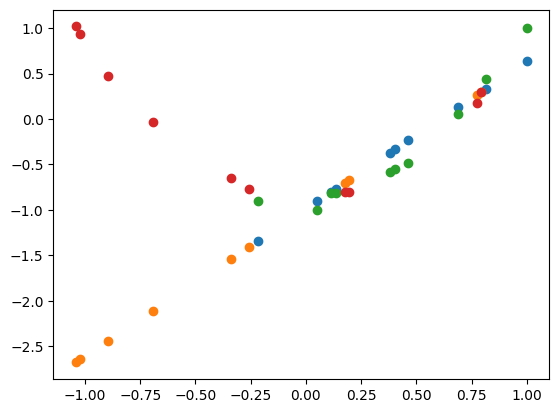

Scores saved as quadratic/0.1_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.07221388816833496 seconds. 
Now scoring model... 


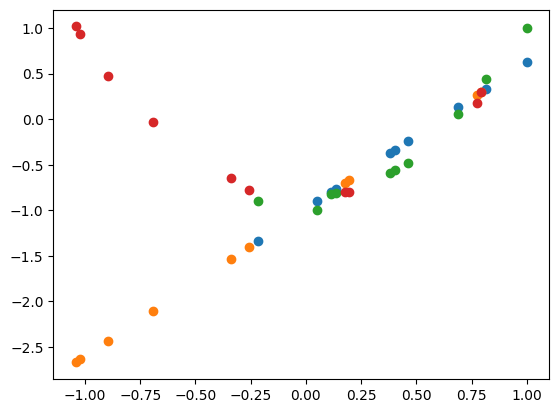

Scores saved as quadratic/0.1_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.0681610107421875 seconds. 
Now scoring model... 


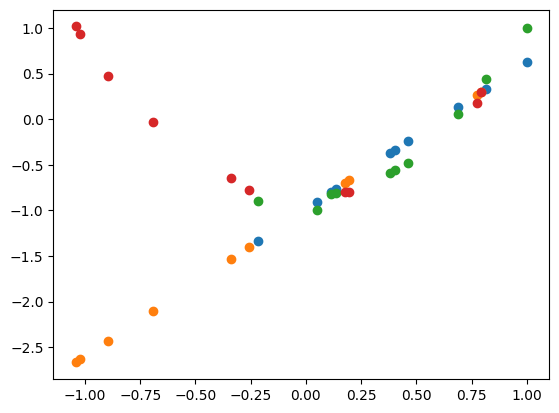

Scores saved as quadratic/0.1_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.06600069999694824 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 848, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_regression.py", line 242, in predict
   

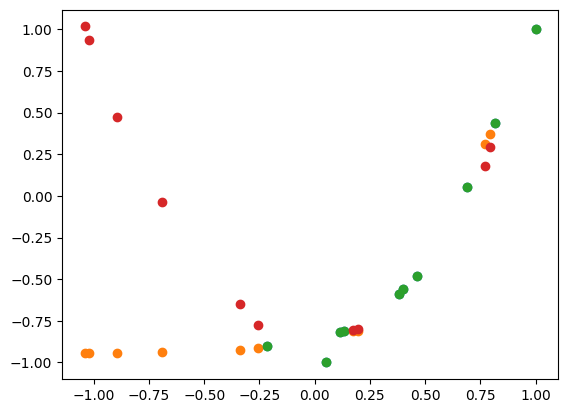

Scores saved as quadratic/0.1_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2873241901397705 seconds. 
Now scoring model... 


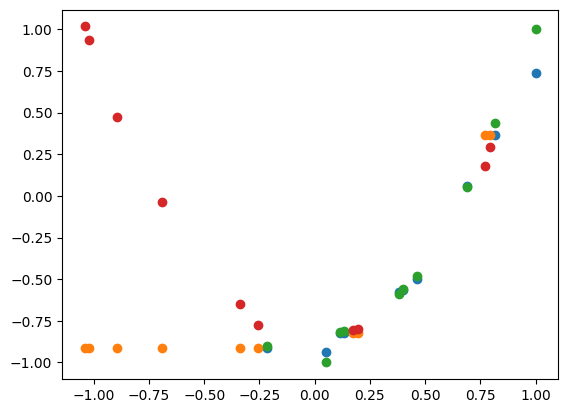

Scores saved as quadratic/0.1_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.46751999855041504 seconds. 
Now scoring model... 


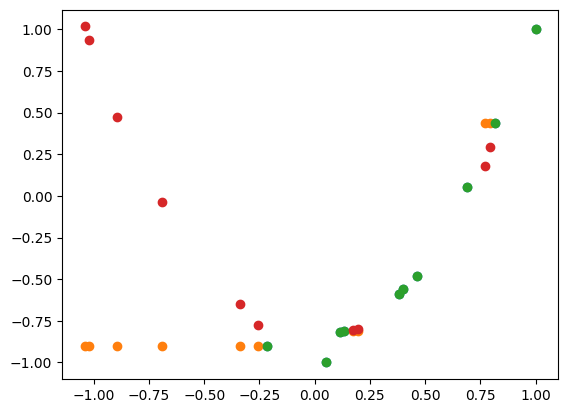

Scores saved as quadratic/0.1_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.02502608299255371 seconds. 
Now scoring model... 


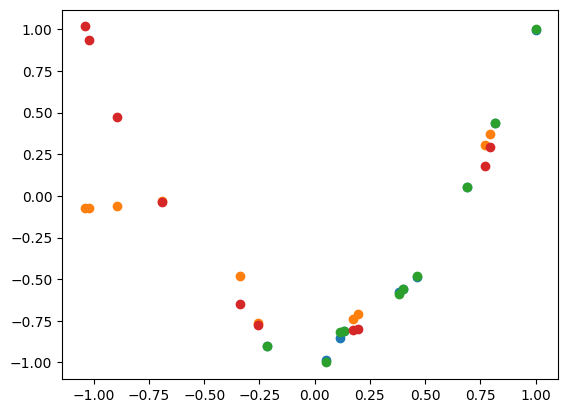

Scores saved as quadratic/0.1_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.05136394500732422 seconds. 
Now scoring model... 


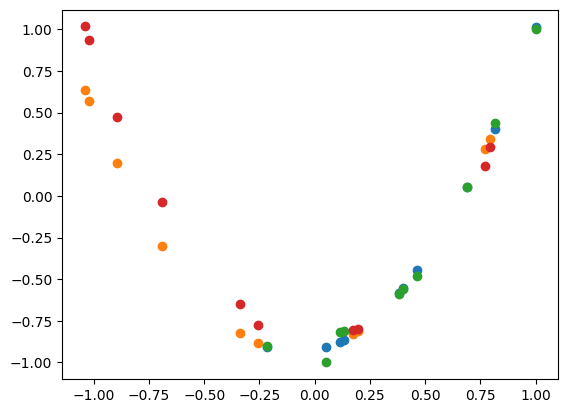

Scores saved as quadratic/0.1_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.026334285736083984 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


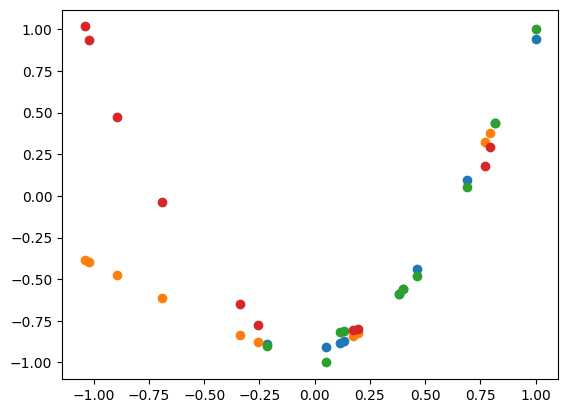

Scores saved as quadratic/0.1_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.03339719772338867 seconds. 
Now scoring model... 


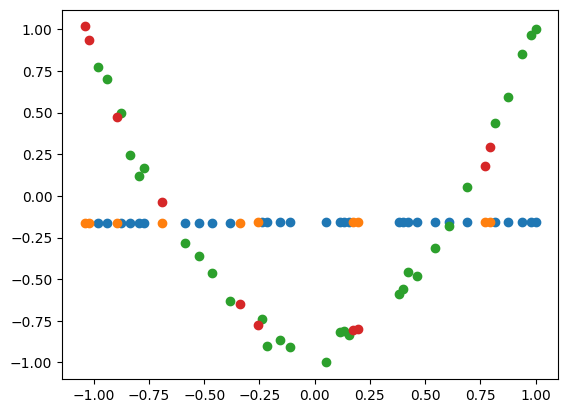

Scores saved as quadratic/0.3_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.040074825286865234 seconds. 
Now scoring model... 


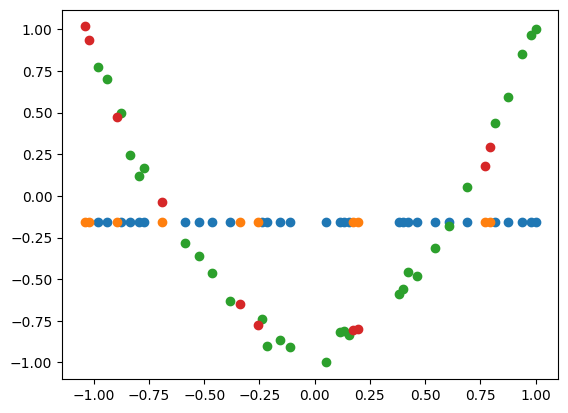

Scores saved as quadratic/0.3_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03750205039978027 seconds. 
Now scoring model... 


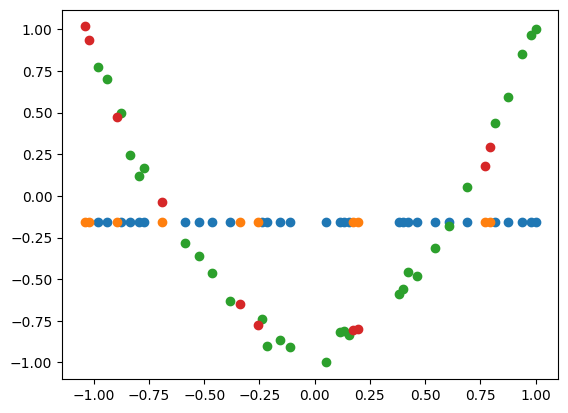

Scores saved as quadratic/0.3_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.024734973907470703 seconds. 
Now scoring model... 


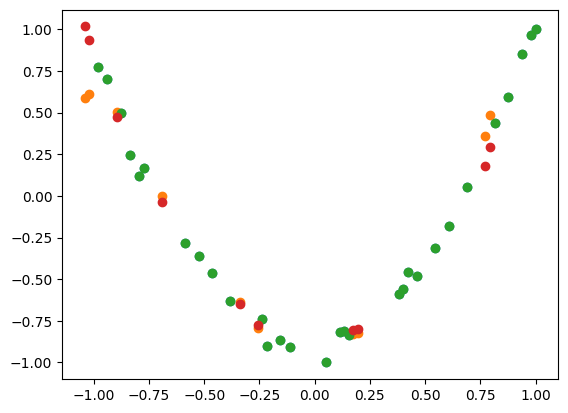

Scores saved as quadratic/0.3_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2627582550048828 seconds. 
Now scoring model... 


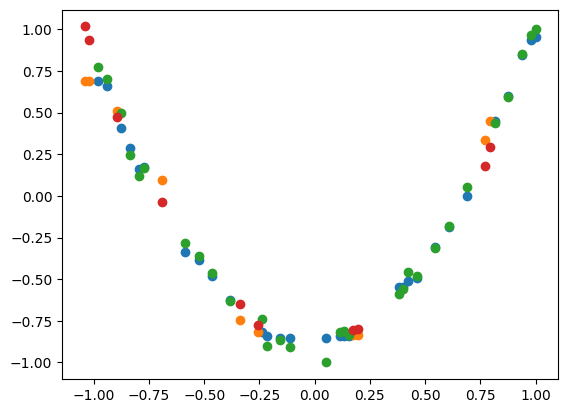

Scores saved as quadratic/0.3_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.5137650966644287 seconds. 
Now scoring model... 


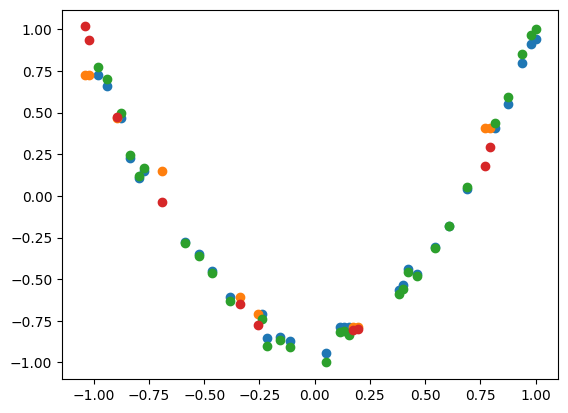

Scores saved as quadratic/0.3_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.026823043823242188 seconds. 
Now scoring model... 


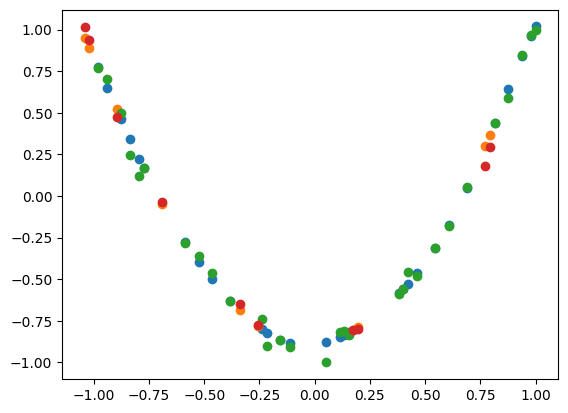

Scores saved as quadratic/0.3_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.050608158111572266 seconds. 
Now scoring model... 


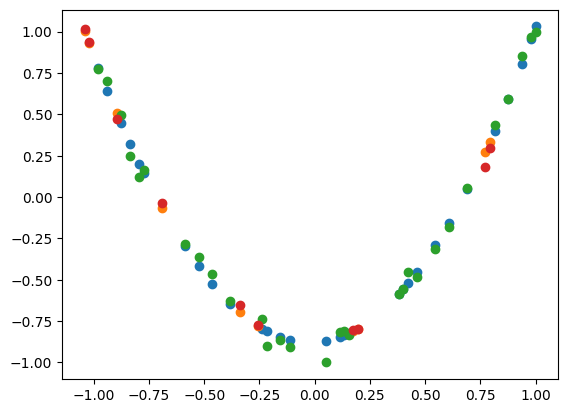

Scores saved as quadratic/0.3_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.02812790870666504 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

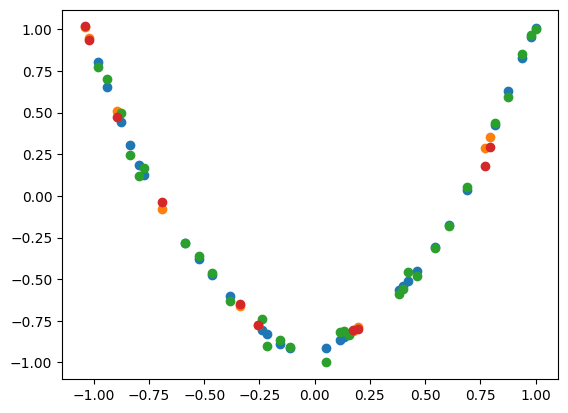

Scores saved as quadratic/0.3_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.037467002868652344 seconds. 
Now scoring model... 


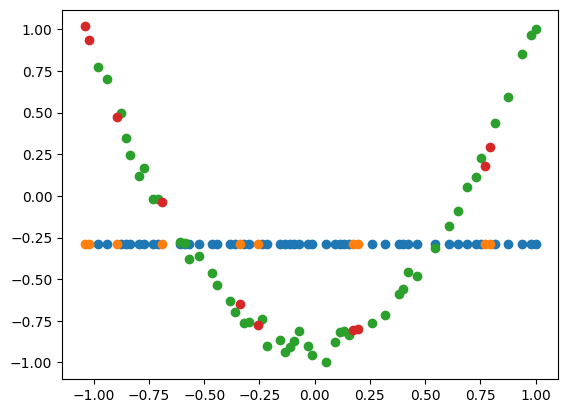

Scores saved as quadratic/0.5_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.03154492378234863 seconds. 
Now scoring model... 


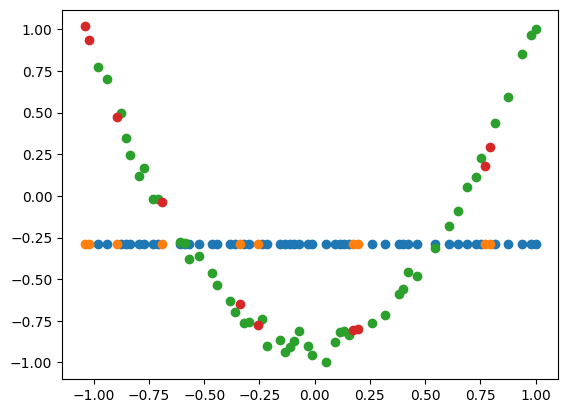

Scores saved as quadratic/0.5_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.04042816162109375 seconds. 
Now scoring model... 


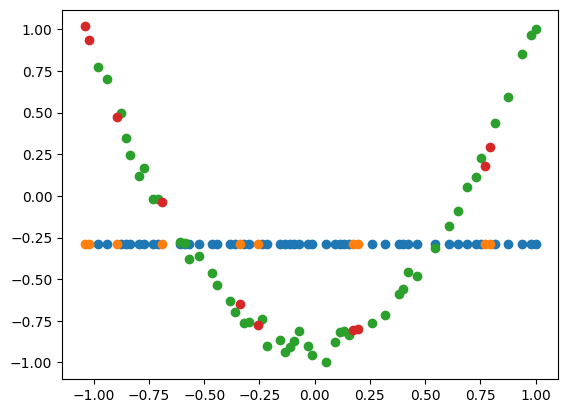

Scores saved as quadratic/0.5_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.02521681785583496 seconds. 
Now scoring model... 


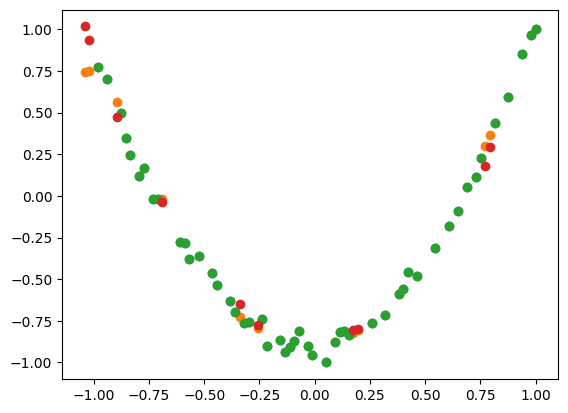

Scores saved as quadratic/0.5_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3265290260314941 seconds. 
Now scoring model... 


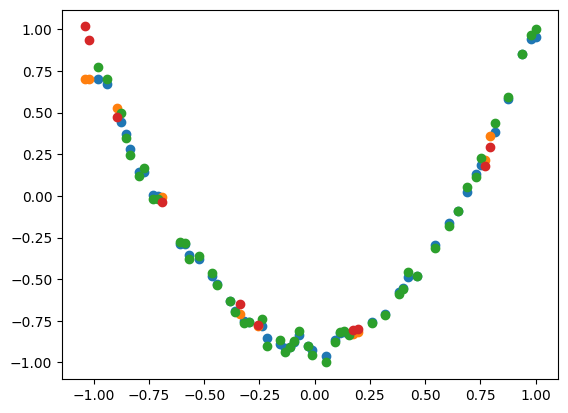

Scores saved as quadratic/0.5_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.5156311988830566 seconds. 
Now scoring model... 


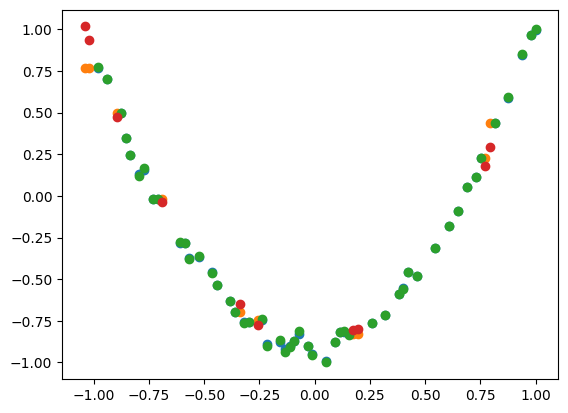

Scores saved as quadratic/0.5_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.02593994140625 seconds. 
Now scoring model... 


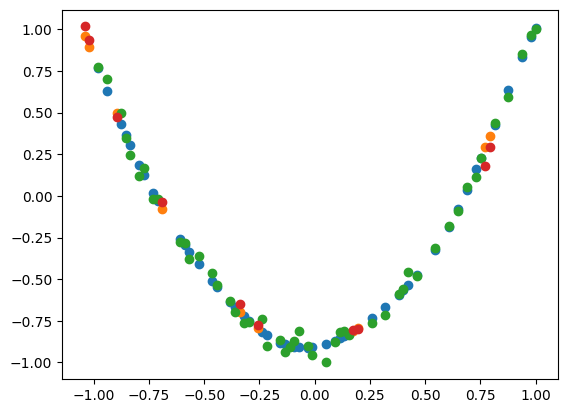

Scores saved as quadratic/0.5_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.04772186279296875 seconds. 
Now scoring model... 


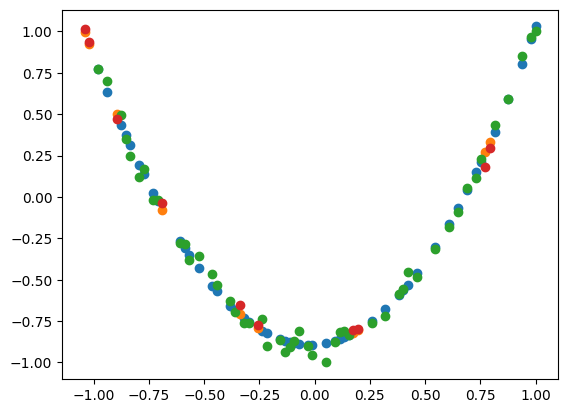

Scores saved as quadratic/0.5_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.09861588478088379 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

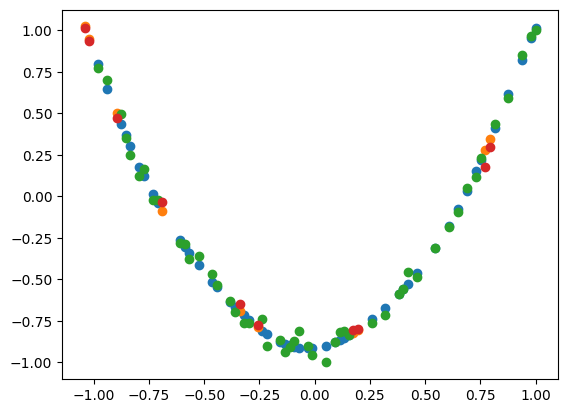

Scores saved as quadratic/0.5_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.03149724006652832 seconds. 
Now scoring model... 


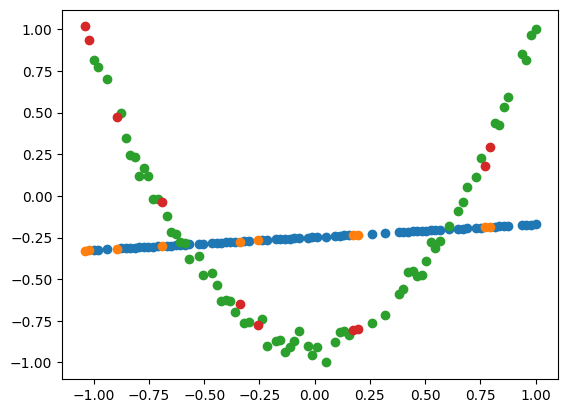

Scores saved as quadratic/0.7_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.025882720947265625 seconds. 
Now scoring model... 


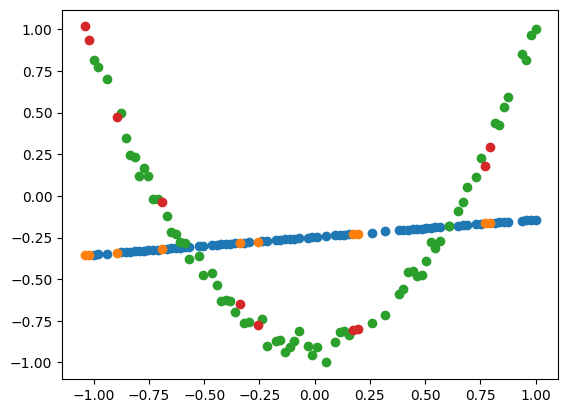

Scores saved as quadratic/0.7_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.05175590515136719 seconds. 
Now scoring model... 


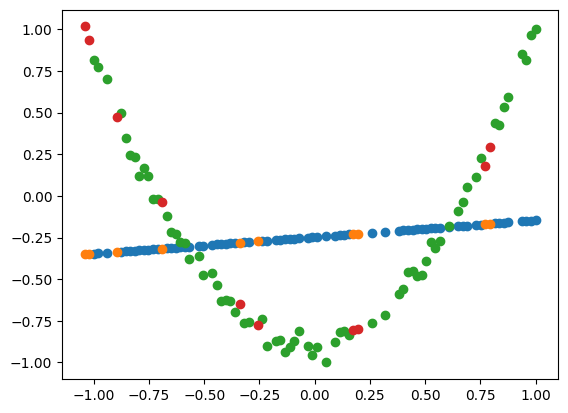

Scores saved as quadratic/0.7_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.026129961013793945 seconds. 
Now scoring model... 


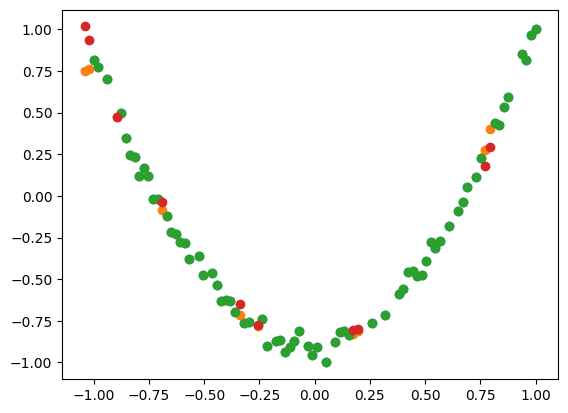

Scores saved as quadratic/0.7_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3119187355041504 seconds. 
Now scoring model... 


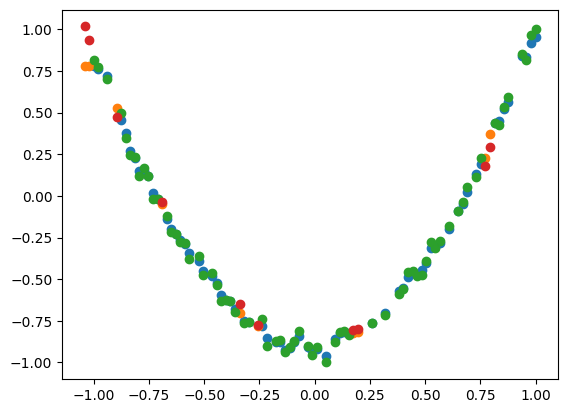

Scores saved as quadratic/0.7_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.5904669761657715 seconds. 
Now scoring model... 


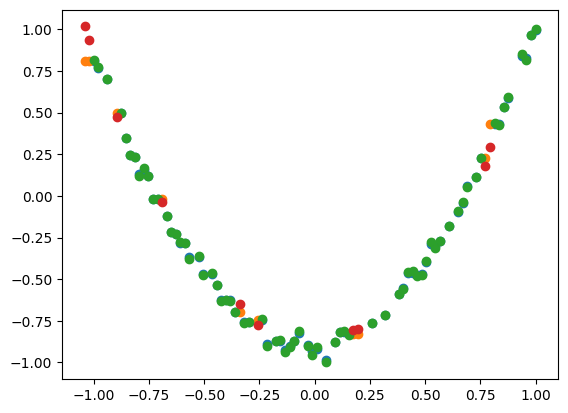

Scores saved as quadratic/0.7_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.03244614601135254 seconds. 
Now scoring model... 


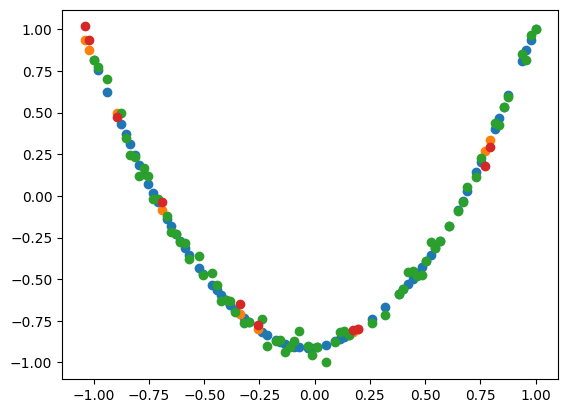

Scores saved as quadratic/0.7_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.05693197250366211 seconds. 
Now scoring model... 


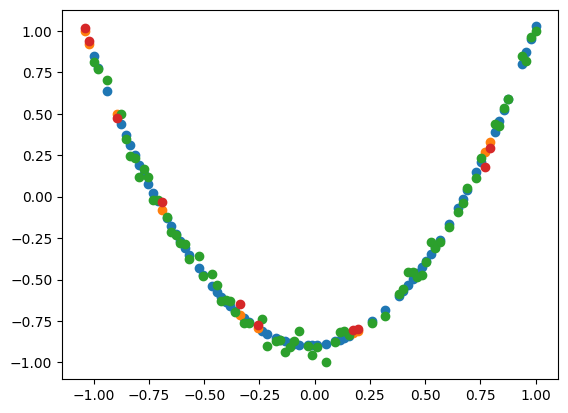

Scores saved as quadratic/0.7_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.05385231971740723 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

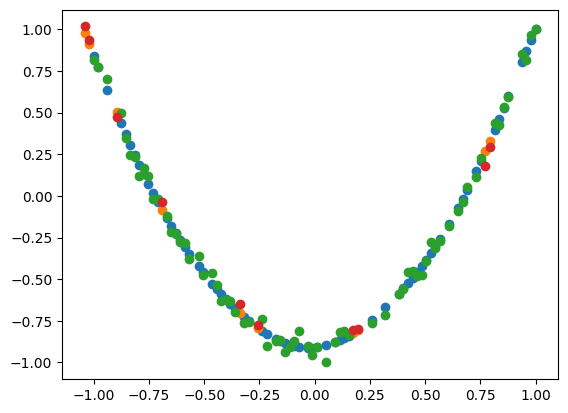

Scores saved as quadratic/0.7_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.03317975997924805 seconds. 
Now scoring model... 


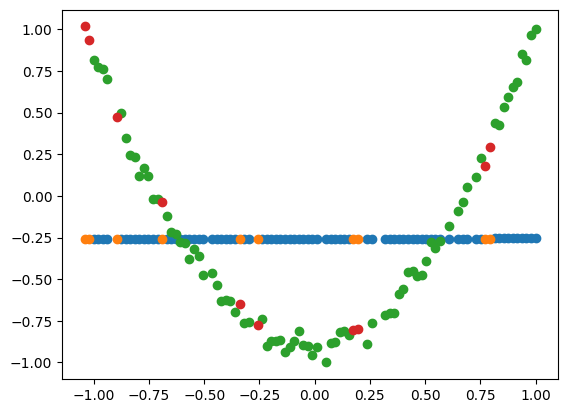

Scores saved as quadratic/0.8_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.03325176239013672 seconds. 
Now scoring model... 


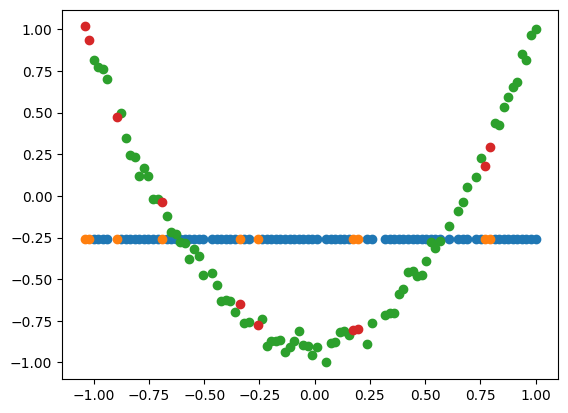

Scores saved as quadratic/0.8_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03953719139099121 seconds. 
Now scoring model... 


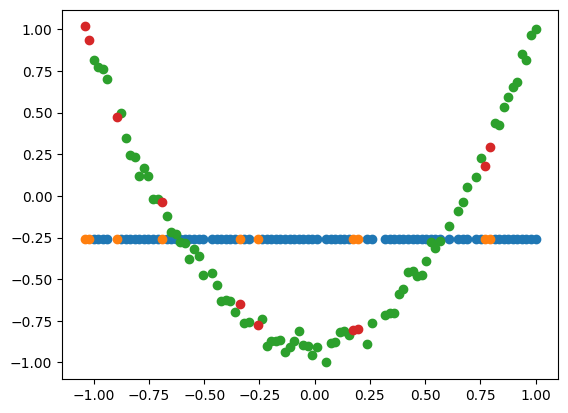

Scores saved as quadratic/0.8_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.027334928512573242 seconds. 
Now scoring model... 


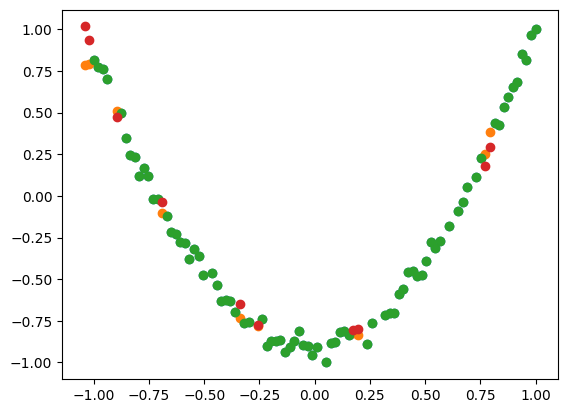

Scores saved as quadratic/0.8_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2713558673858643 seconds. 
Now scoring model... 


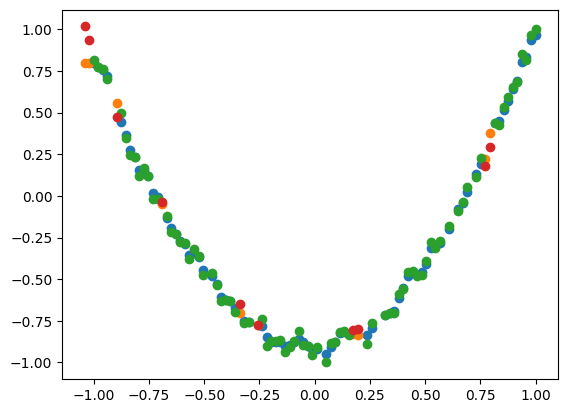

Scores saved as quadratic/0.8_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.5055727958679199 seconds. 
Now scoring model... 


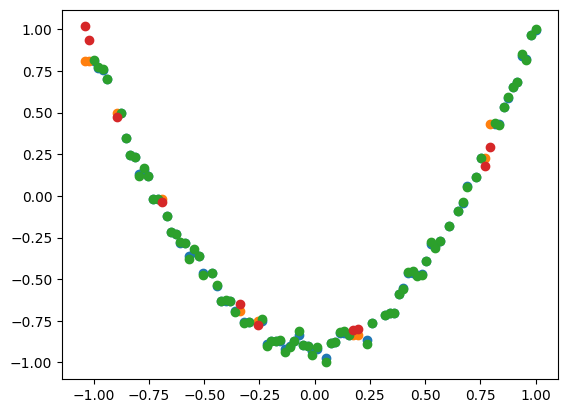

Scores saved as quadratic/0.8_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.02482914924621582 seconds. 
Now scoring model... 


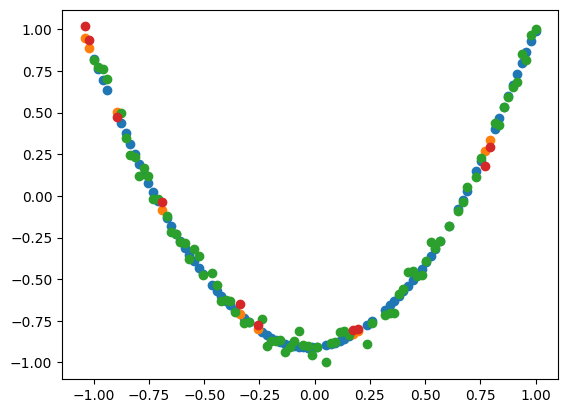

Scores saved as quadratic/0.8_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.06497907638549805 seconds. 
Now scoring model... 


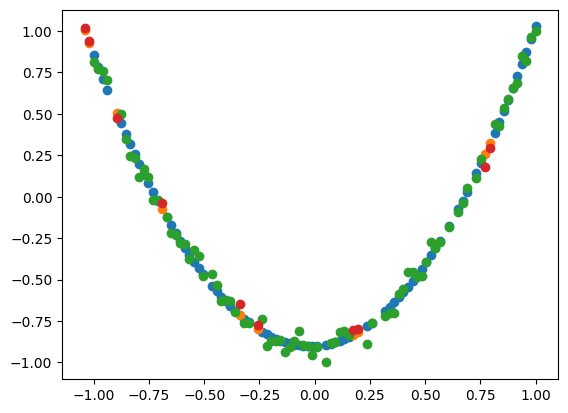

Scores saved as quadratic/0.8_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.09156298637390137 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

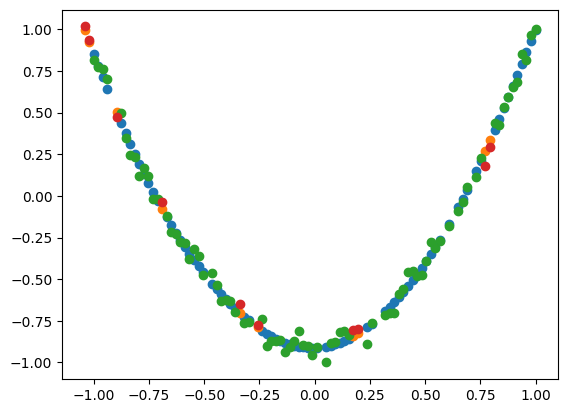

Scores saved as quadratic/0.8_gpr_scores.json. 


  0%|          | 0/5 [00:00<?, ?it/s]

Now fitting ridge... 
Completed fitting ridge in 0.03455710411071777 seconds. 
Now scoring model... 


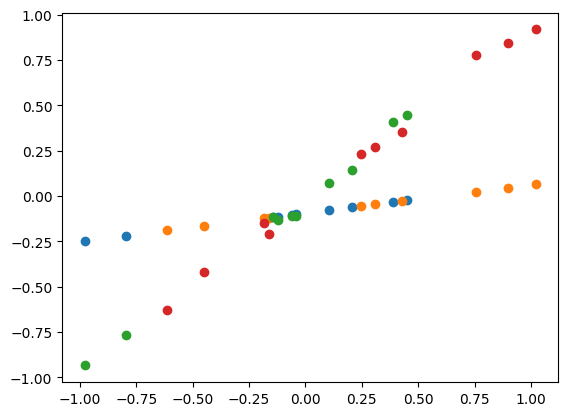

Scores saved as linear/0.1_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.036412954330444336 seconds. 
Now scoring model... 


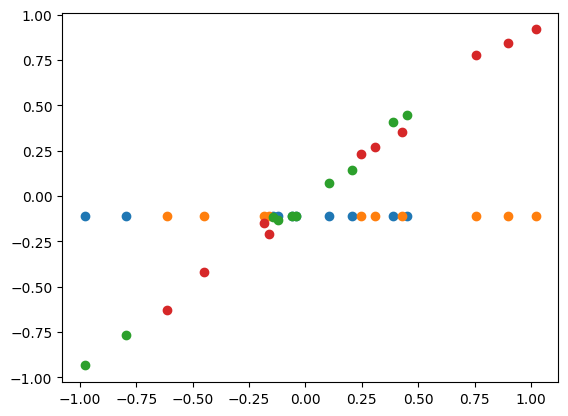

Scores saved as linear/0.1_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.038285017013549805 seconds. 
Now scoring model... 


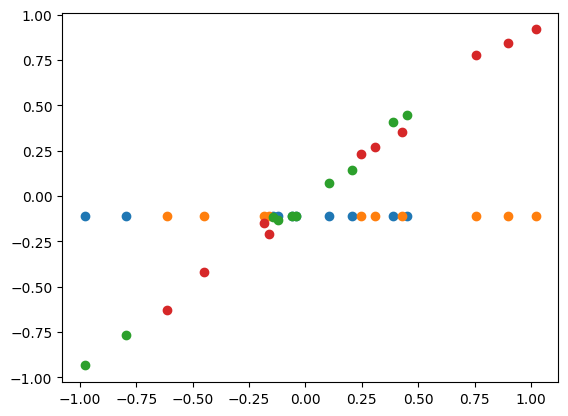

Scores saved as linear/0.1_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.027952194213867188 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 848, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_regression.py", line 242, in predict
   

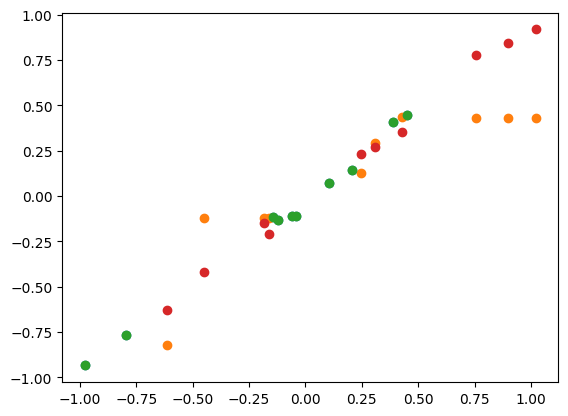

Scores saved as linear/0.1_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2475357055664062 seconds. 
Now scoring model... 


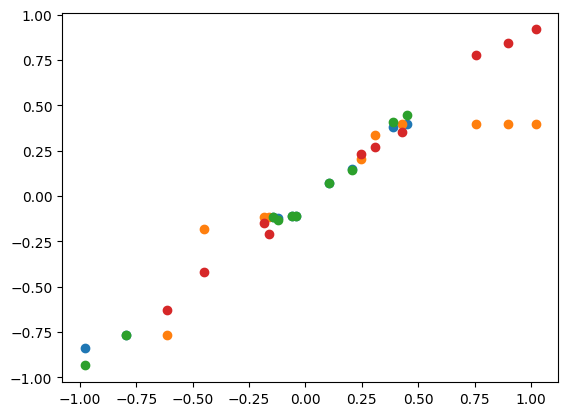

Scores saved as linear/0.1_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4657871723175049 seconds. 
Now scoring model... 


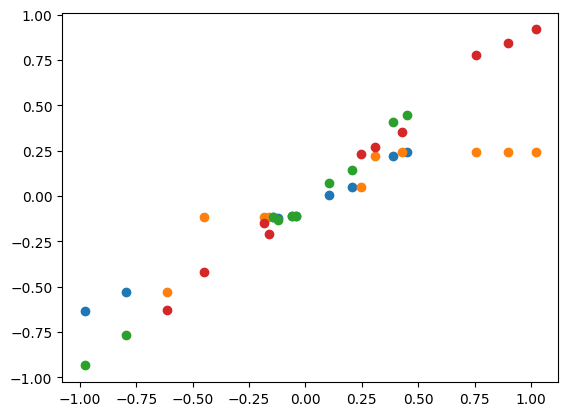

Scores saved as linear/0.1_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.02623891830444336 seconds. 
Now scoring model... 


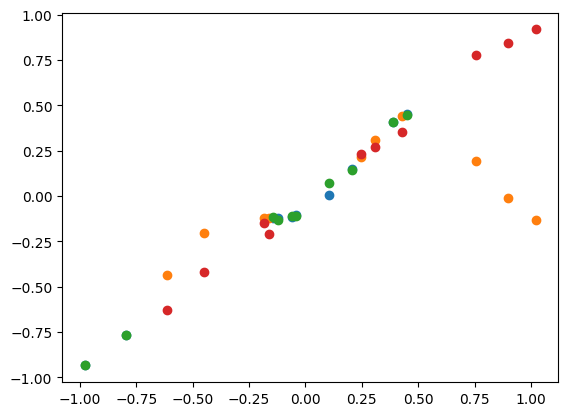

Scores saved as linear/0.1_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.048767805099487305 seconds. 
Now scoring model... 


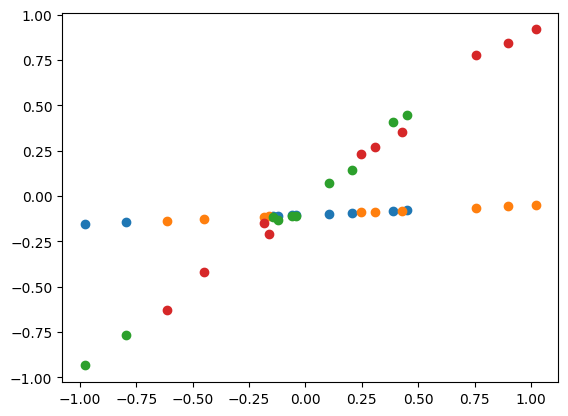

Scores saved as linear/0.1_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.014324188232421875 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


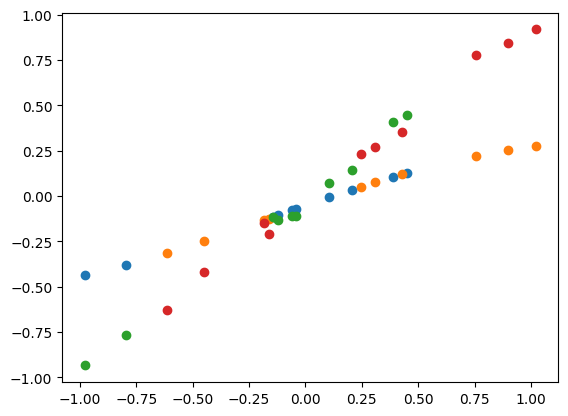

Scores saved as linear/0.1_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.03416895866394043 seconds. 
Now scoring model... 


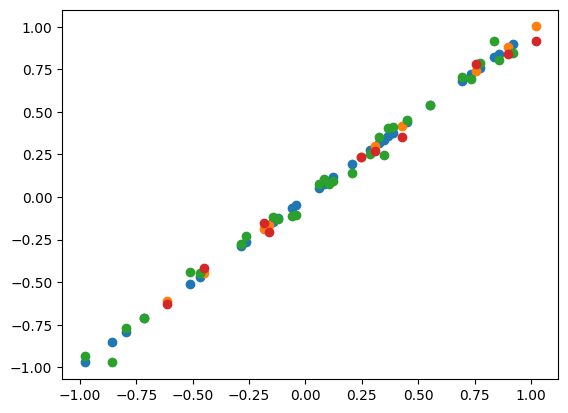

Scores saved as linear/0.3_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.04902791976928711 seconds. 
Now scoring model... 


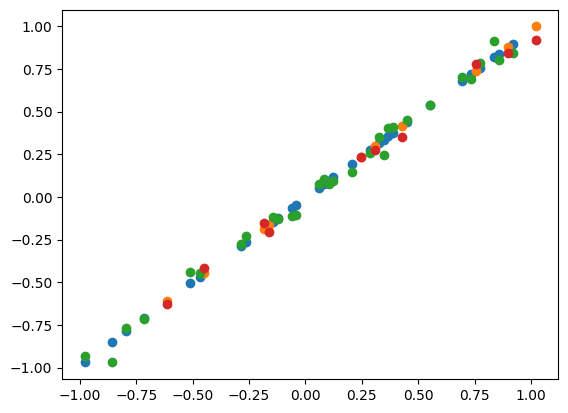

Scores saved as linear/0.3_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03945517539978027 seconds. 
Now scoring model... 


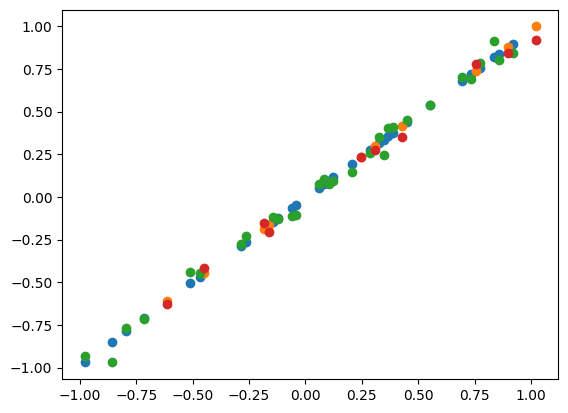

Scores saved as linear/0.3_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.025660276412963867 seconds. 
Now scoring model... 


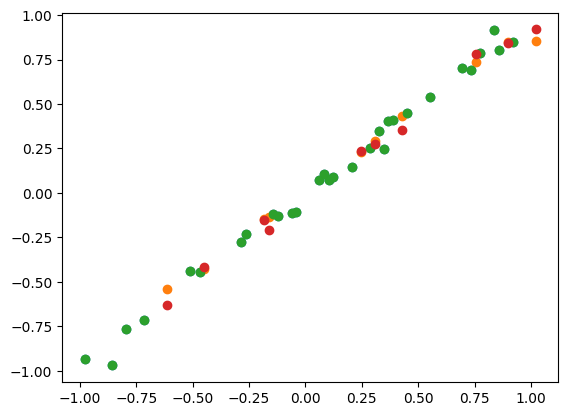

Scores saved as linear/0.3_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2529661655426025 seconds. 
Now scoring model... 


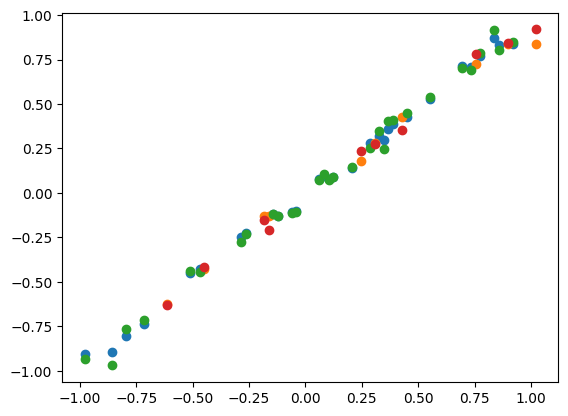

Scores saved as linear/0.3_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4871790409088135 seconds. 
Now scoring model... 


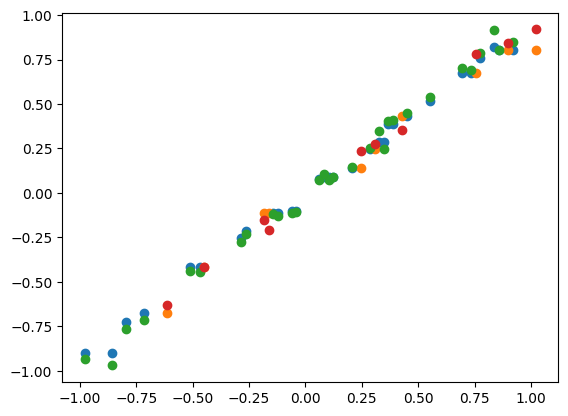

Scores saved as linear/0.3_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.025079011917114258 seconds. 
Now scoring model... 


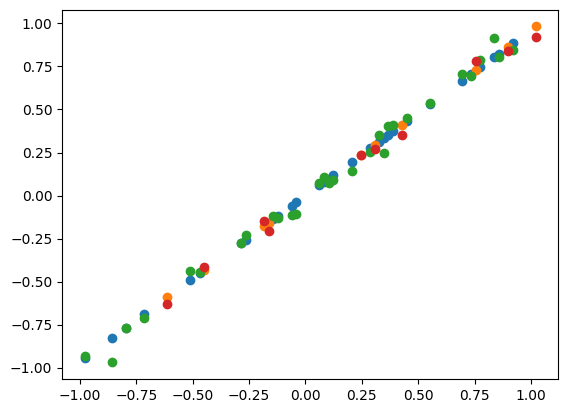

Scores saved as linear/0.3_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.05148482322692871 seconds. 
Now scoring model... 


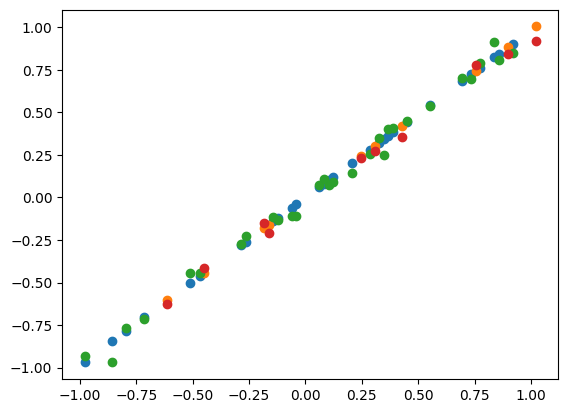

Scores saved as linear/0.3_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.02799701690673828 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

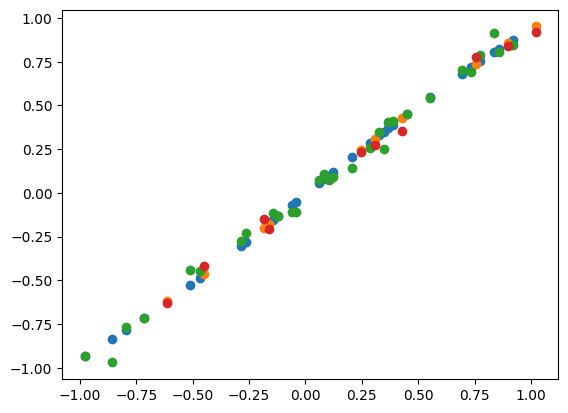

Scores saved as linear/0.3_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.03248405456542969 seconds. 
Now scoring model... 


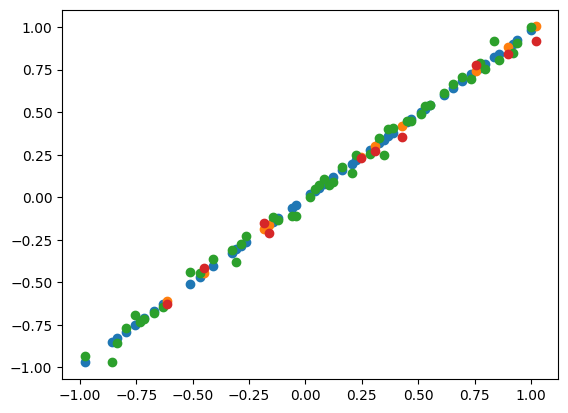

Scores saved as linear/0.5_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.03261089324951172 seconds. 
Now scoring model... 


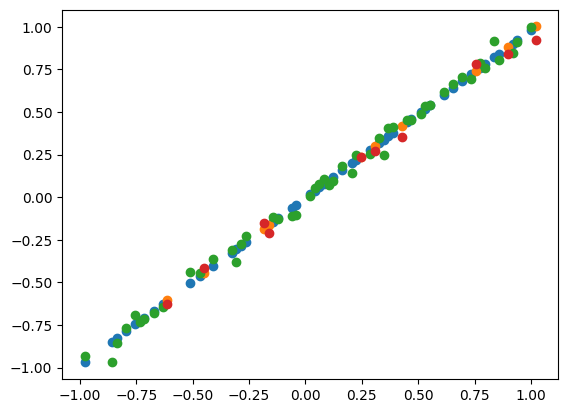

Scores saved as linear/0.5_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03713202476501465 seconds. 
Now scoring model... 


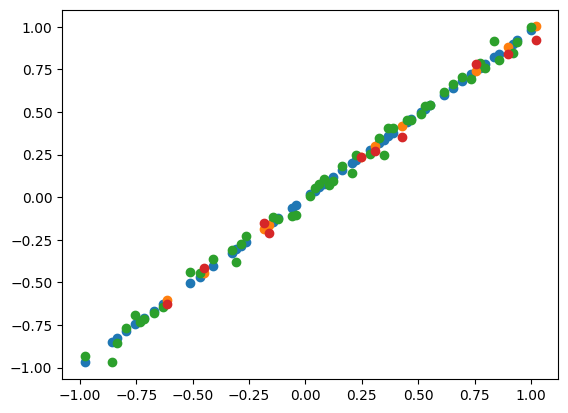

Scores saved as linear/0.5_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.025483131408691406 seconds. 
Now scoring model... 


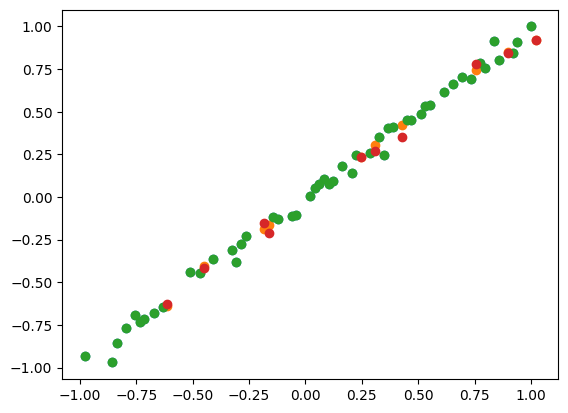

Scores saved as linear/0.5_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2977380752563477 seconds. 
Now scoring model... 


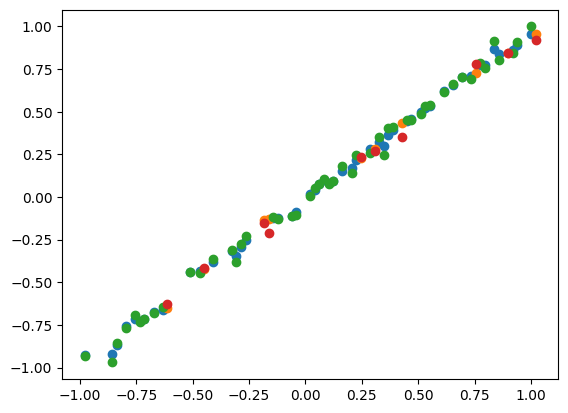

Scores saved as linear/0.5_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4916400909423828 seconds. 
Now scoring model... 


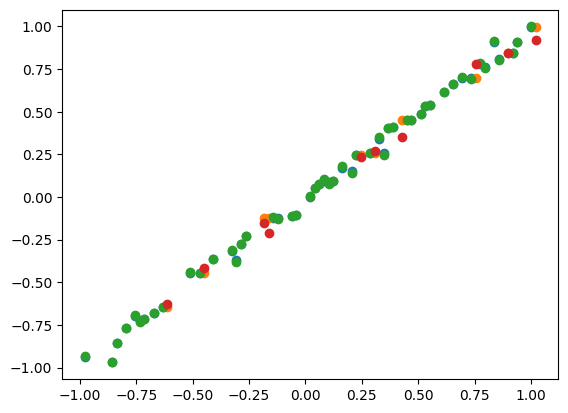

Scores saved as linear/0.5_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.027973175048828125 seconds. 
Now scoring model... 


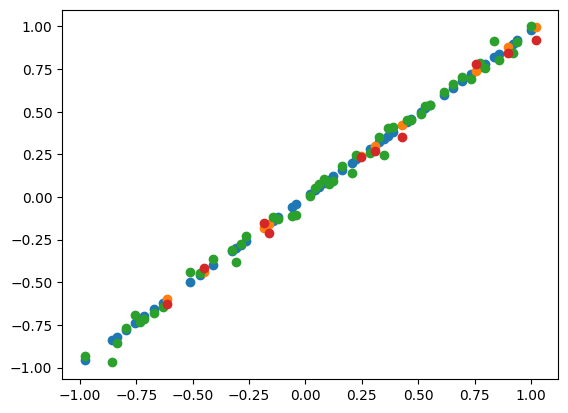

Scores saved as linear/0.5_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.050534963607788086 seconds. 
Now scoring model... 


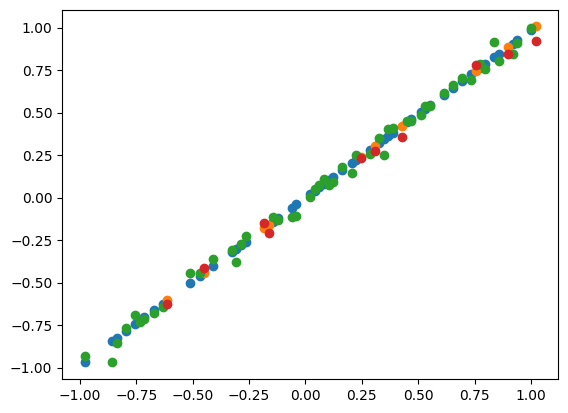

Scores saved as linear/0.5_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.06810116767883301 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

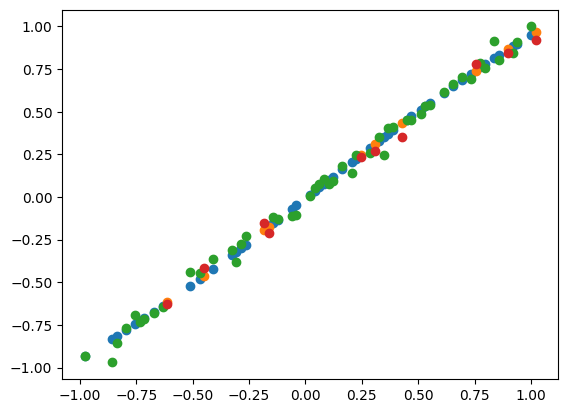

Scores saved as linear/0.5_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.03191709518432617 seconds. 
Now scoring model... 


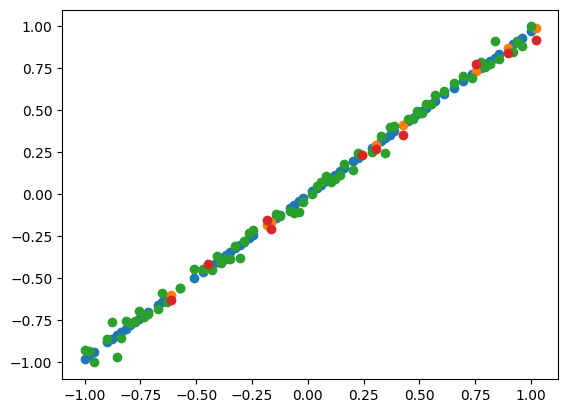

Scores saved as linear/0.7_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.04134798049926758 seconds. 
Now scoring model... 


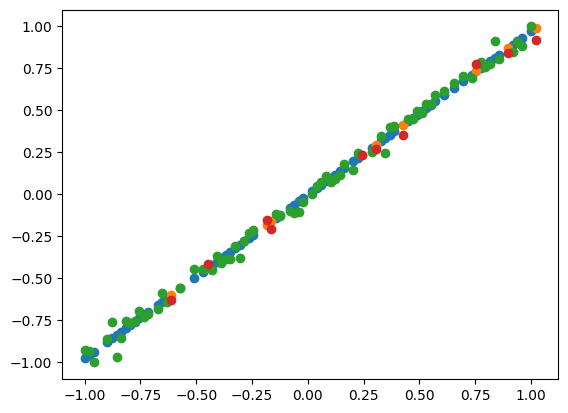

Scores saved as linear/0.7_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03650403022766113 seconds. 
Now scoring model... 


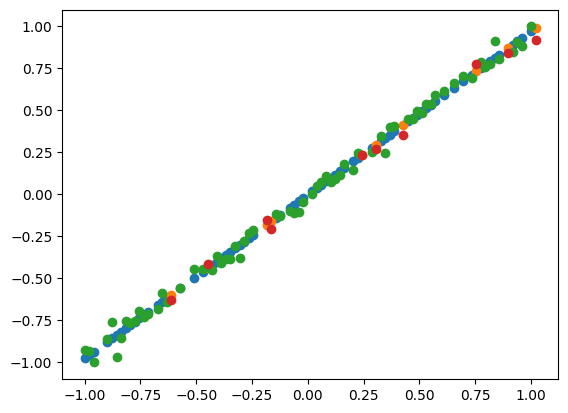

Scores saved as linear/0.7_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.026770830154418945 seconds. 
Now scoring model... 


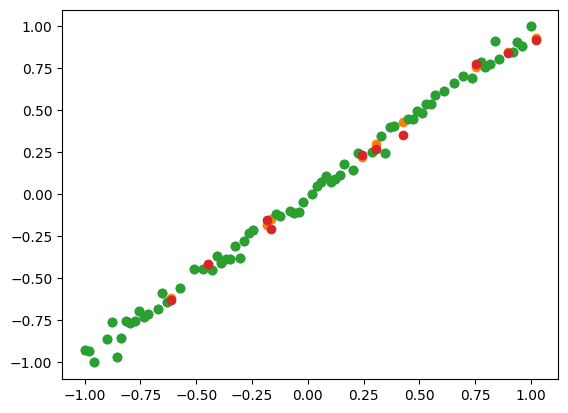

Scores saved as linear/0.7_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2239601612091064 seconds. 
Now scoring model... 


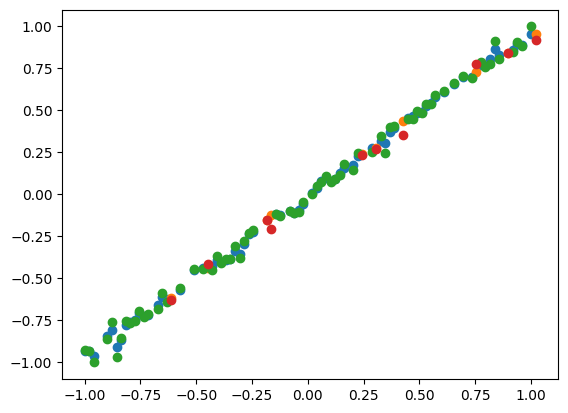

Scores saved as linear/0.7_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.5347511768341064 seconds. 
Now scoring model... 


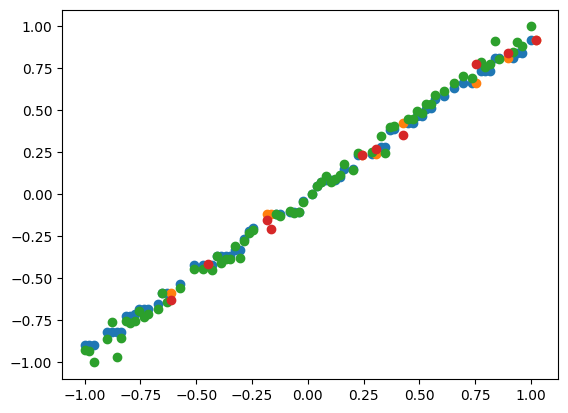

Scores saved as linear/0.7_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.027231931686401367 seconds. 
Now scoring model... 


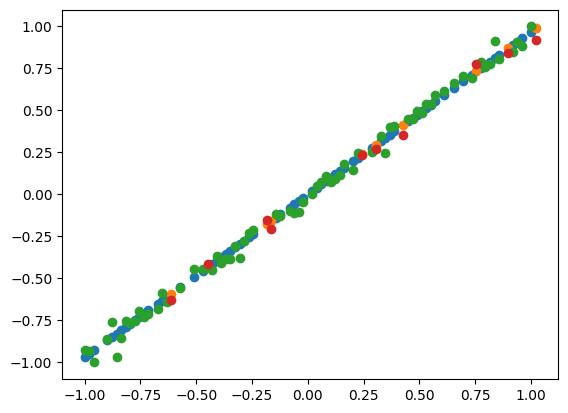

Scores saved as linear/0.7_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.0724949836730957 seconds. 
Now scoring model... 


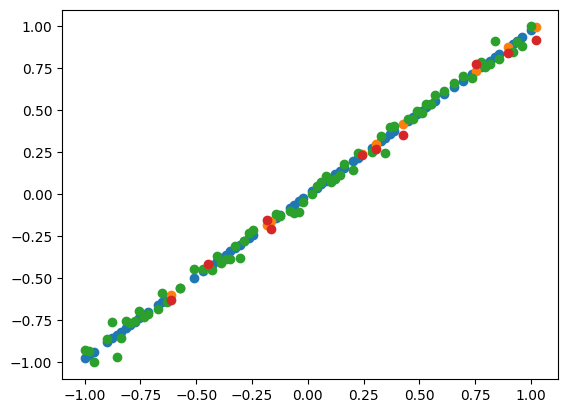

Scores saved as linear/0.7_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.16414880752563477 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


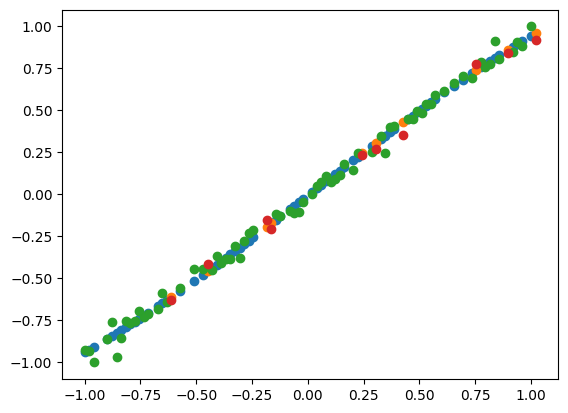

Scores saved as linear/0.7_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.040177106857299805 seconds. 
Now scoring model... 


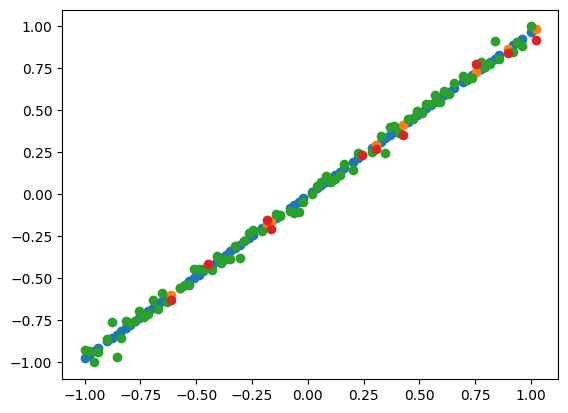

Scores saved as linear/0.8_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.03905081748962402 seconds. 
Now scoring model... 


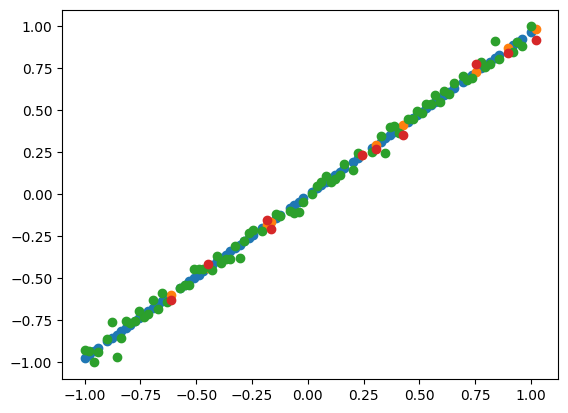

Scores saved as linear/0.8_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03478598594665527 seconds. 
Now scoring model... 


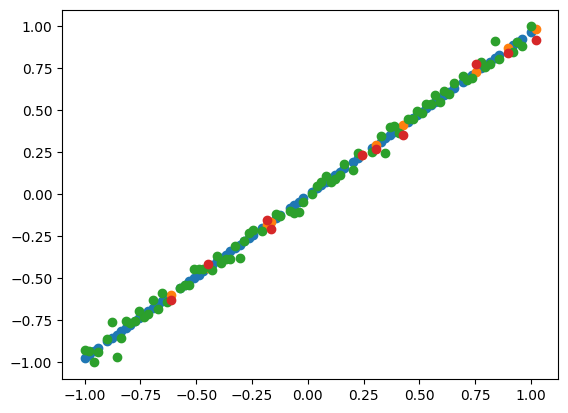

Scores saved as linear/0.8_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.02659893035888672 seconds. 
Now scoring model... 


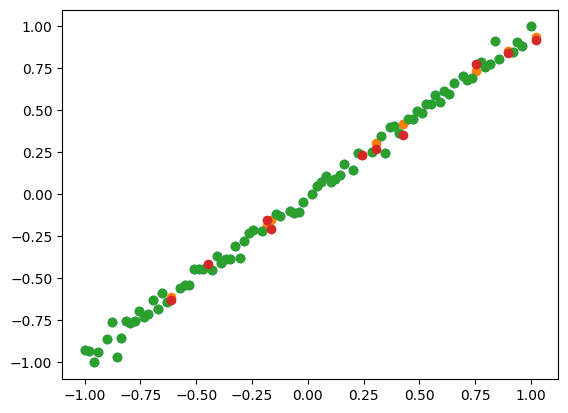

Scores saved as linear/0.8_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.1941869258880615 seconds. 
Now scoring model... 


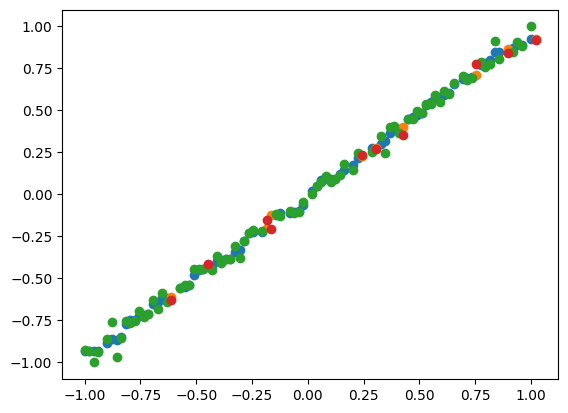

Scores saved as linear/0.8_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.5036652088165283 seconds. 
Now scoring model... 


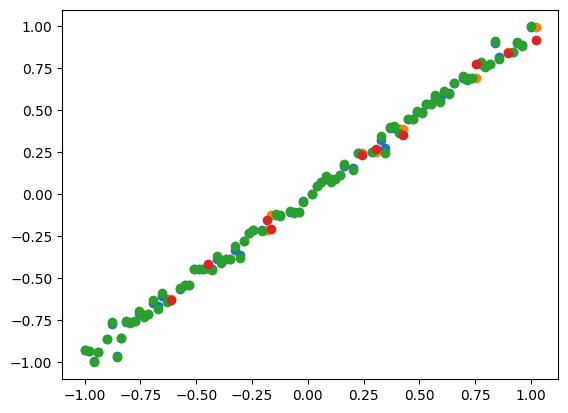

Scores saved as linear/0.8_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.027439117431640625 seconds. 
Now scoring model... 


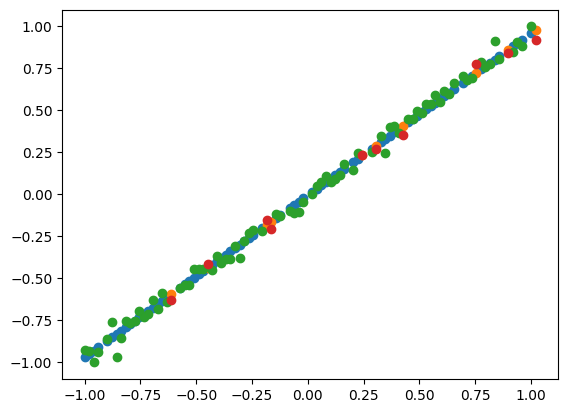

Scores saved as linear/0.8_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.06188702583312988 seconds. 
Now scoring model... 


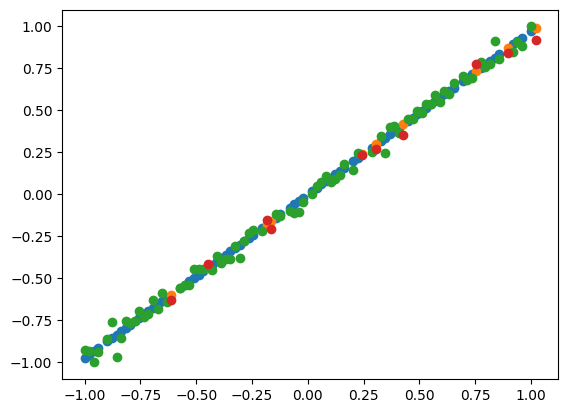

Scores saved as linear/0.8_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.16411590576171875 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


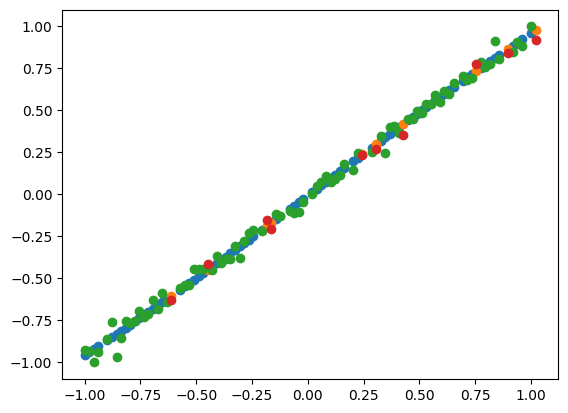

Scores saved as linear/0.8_gpr_scores.json. 


  0%|          | 0/5 [00:00<?, ?it/s]

Now fitting ridge... 
Completed fitting ridge in 0.03505206108093262 seconds. 
Now scoring model... 


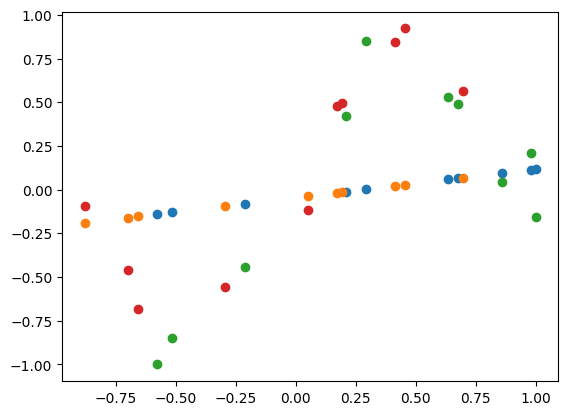

Scores saved as sine/0.1_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.033754825592041016 seconds. 
Now scoring model... 


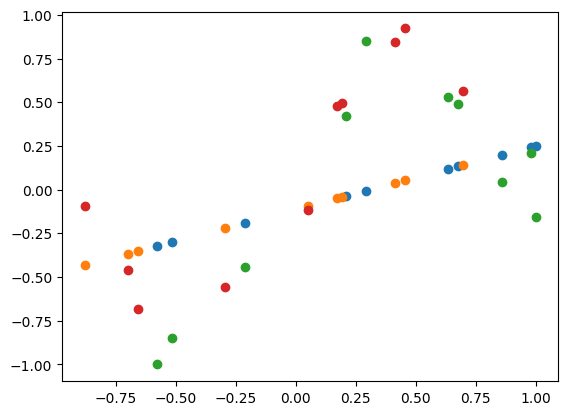

Scores saved as sine/0.1_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.05218195915222168 seconds. 
Now scoring model... 


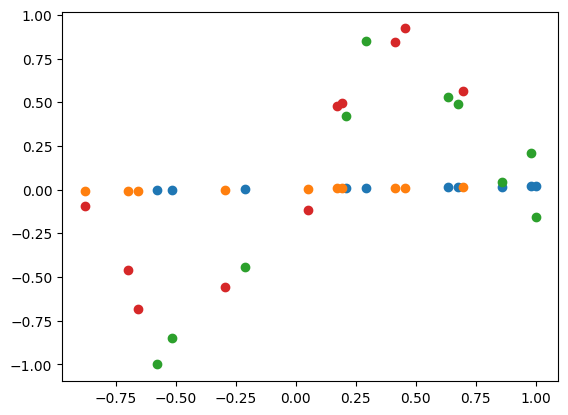

Scores saved as sine/0.1_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.026871681213378906 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 848, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_regression.py", line 242, in predict
   

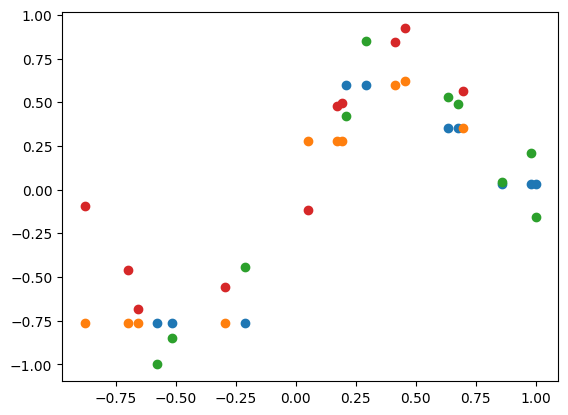

Scores saved as sine/0.1_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2705049514770508 seconds. 
Now scoring model... 


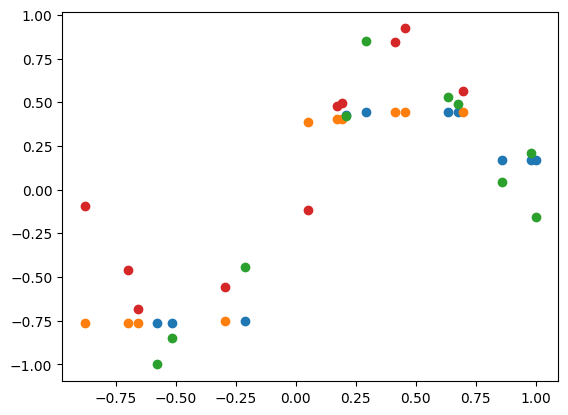

Scores saved as sine/0.1_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.49106407165527344 seconds. 
Now scoring model... 


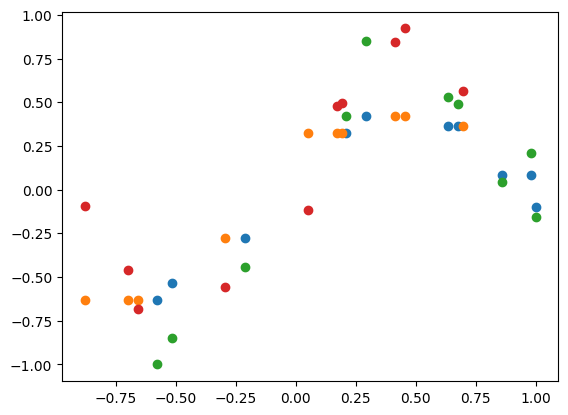

Scores saved as sine/0.1_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.026378870010375977 seconds. 
Now scoring model... 


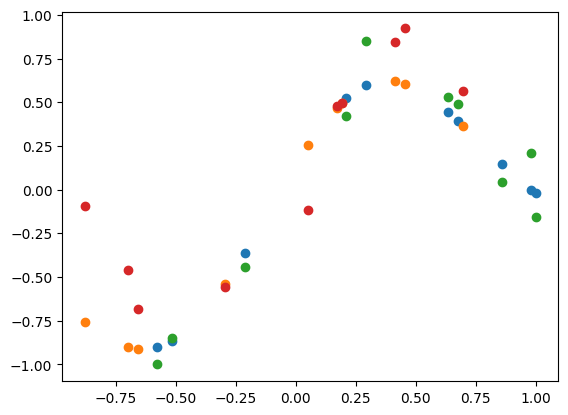

Scores saved as sine/0.1_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.05024981498718262 seconds. 
Now scoring model... 


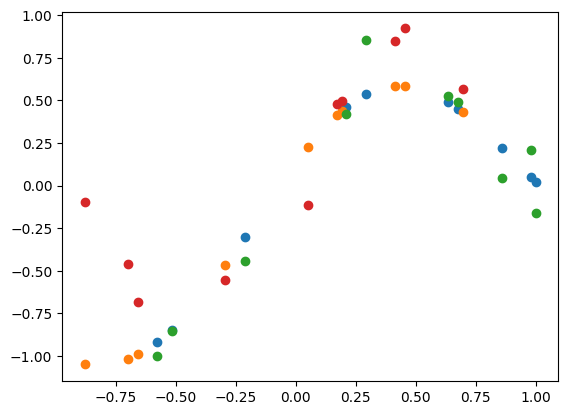

Scores saved as sine/0.1_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.015833139419555664 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

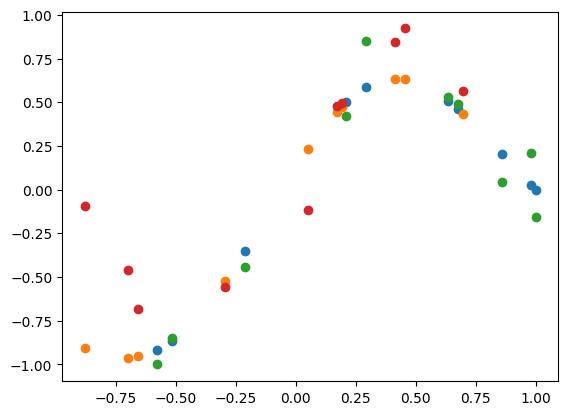

Scores saved as sine/0.1_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.045891761779785156 seconds. 
Now scoring model... 


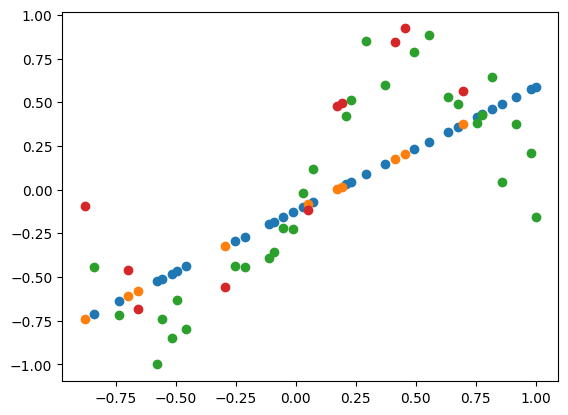

Scores saved as sine/0.3_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.08574891090393066 seconds. 
Now scoring model... 


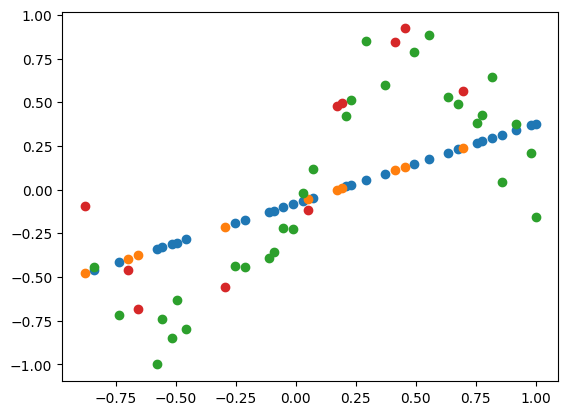

Scores saved as sine/0.3_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03790688514709473 seconds. 
Now scoring model... 


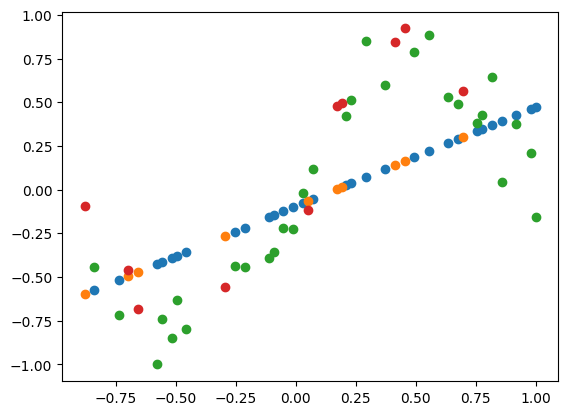

Scores saved as sine/0.3_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.02591705322265625 seconds. 
Now scoring model... 


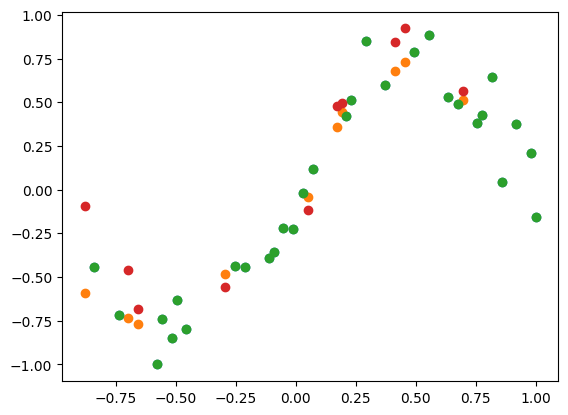

Scores saved as sine/0.3_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3550052642822266 seconds. 
Now scoring model... 


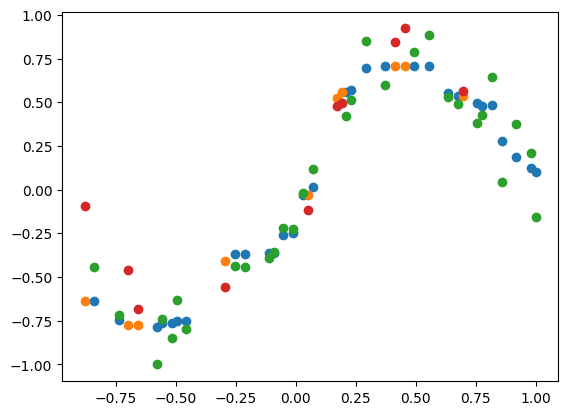

Scores saved as sine/0.3_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.5605688095092773 seconds. 
Now scoring model... 


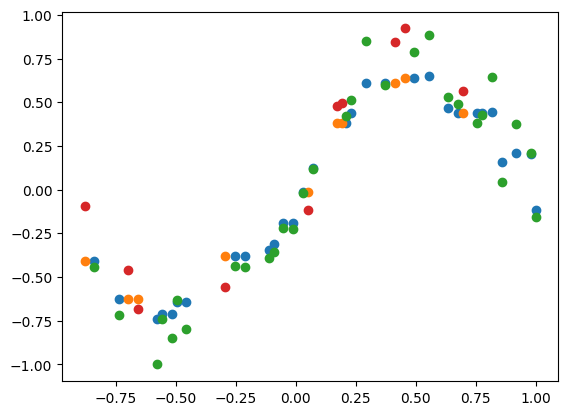

Scores saved as sine/0.3_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.028225183486938477 seconds. 
Now scoring model... 


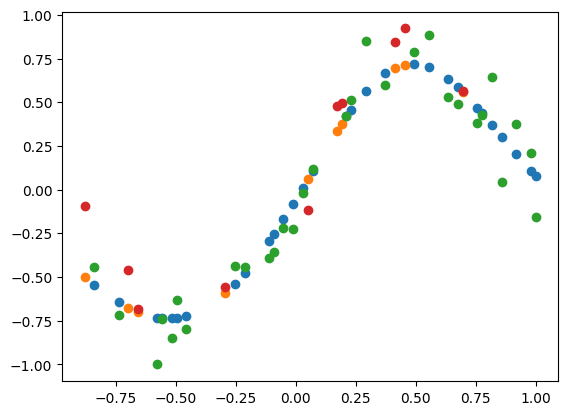

Scores saved as sine/0.3_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.06119108200073242 seconds. 
Now scoring model... 


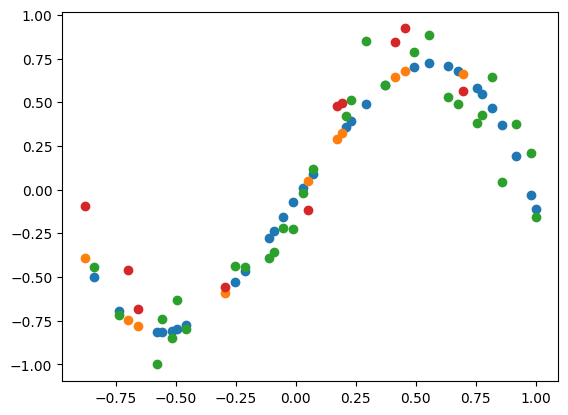

Scores saved as sine/0.3_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.02715897560119629 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

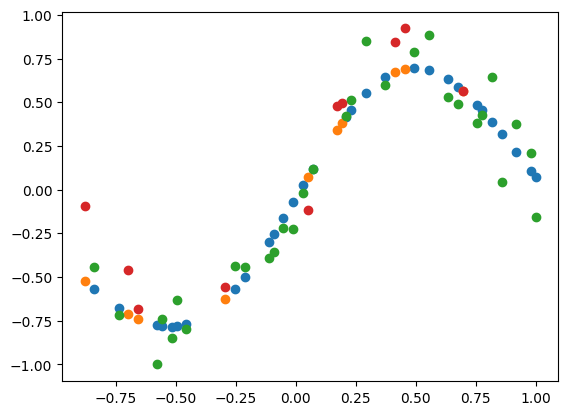

Scores saved as sine/0.3_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.04013514518737793 seconds. 
Now scoring model... 


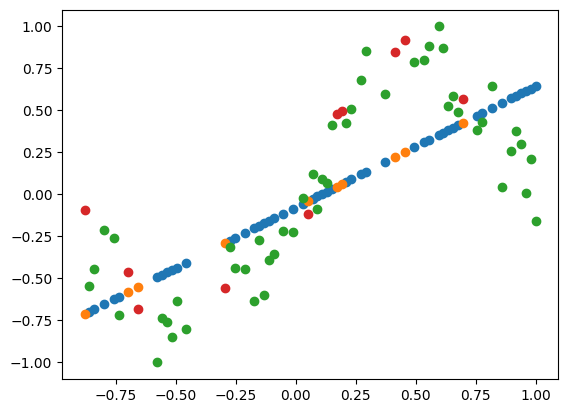

Scores saved as sine/0.5_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.03316998481750488 seconds. 
Now scoring model... 


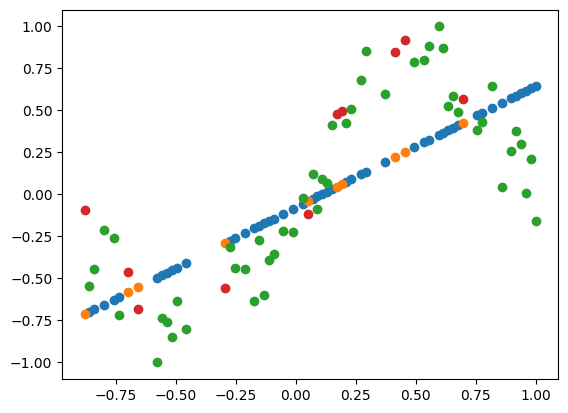

Scores saved as sine/0.5_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.03726506233215332 seconds. 
Now scoring model... 


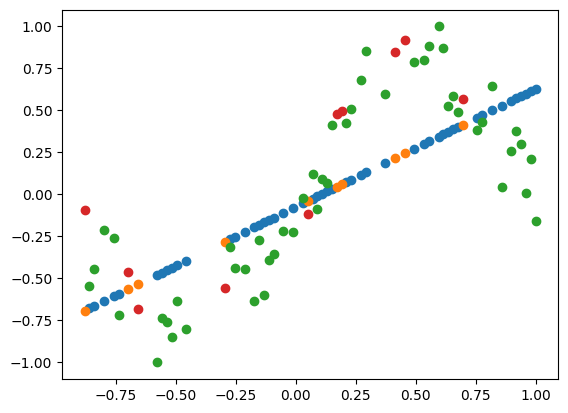

Scores saved as sine/0.5_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.027590036392211914 seconds. 
Now scoring model... 


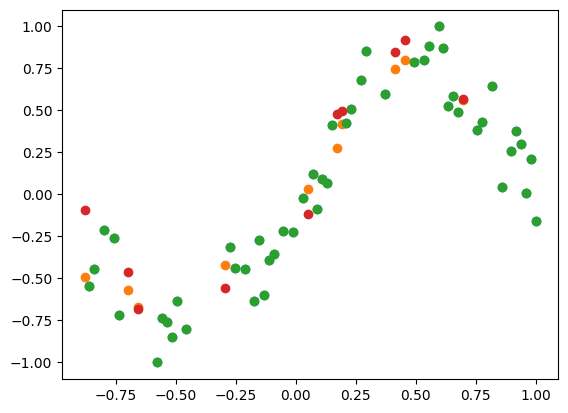

Scores saved as sine/0.5_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.4418587684631348 seconds. 
Now scoring model... 


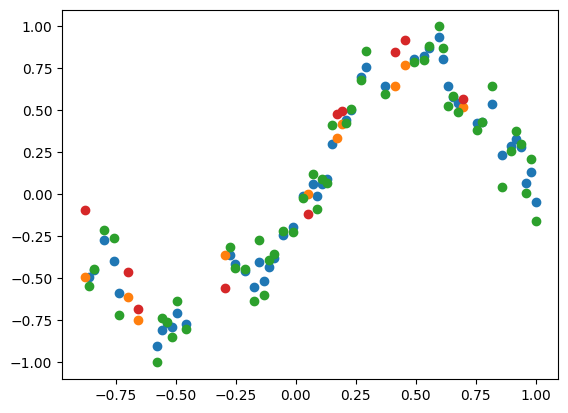

Scores saved as sine/0.5_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.6046760082244873 seconds. 
Now scoring model... 


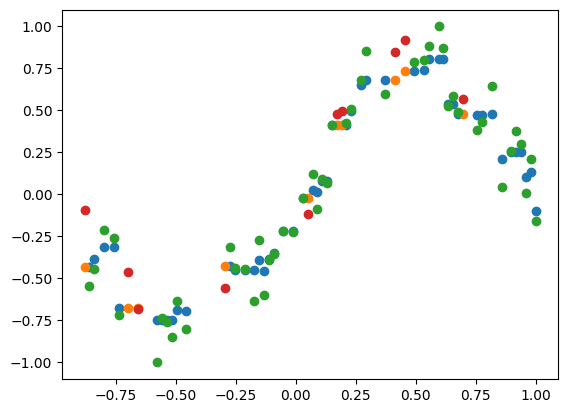

Scores saved as sine/0.5_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.026485204696655273 seconds. 
Now scoring model... 


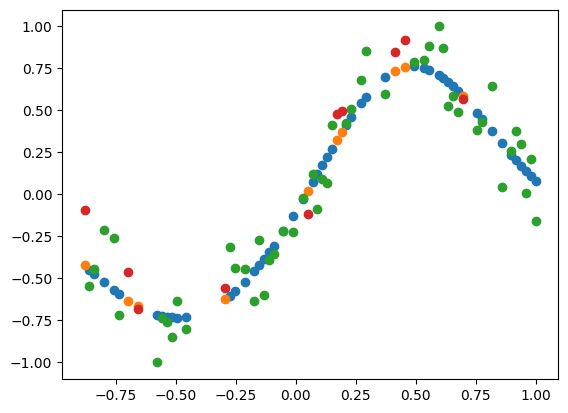

Scores saved as sine/0.5_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.06139111518859863 seconds. 
Now scoring model... 


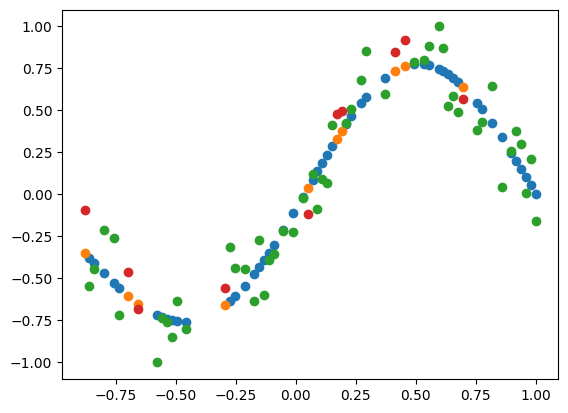

Scores saved as sine/0.5_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.09900689125061035 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

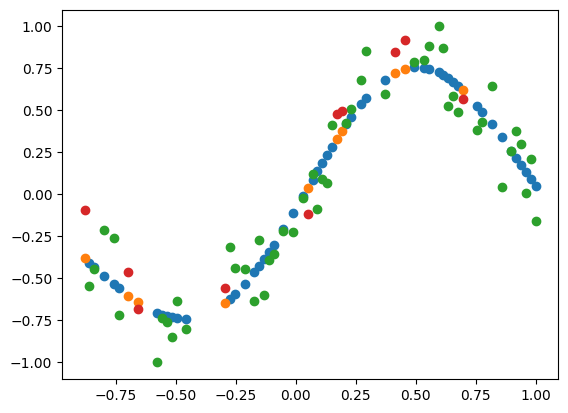

Scores saved as sine/0.5_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.03291797637939453 seconds. 
Now scoring model... 


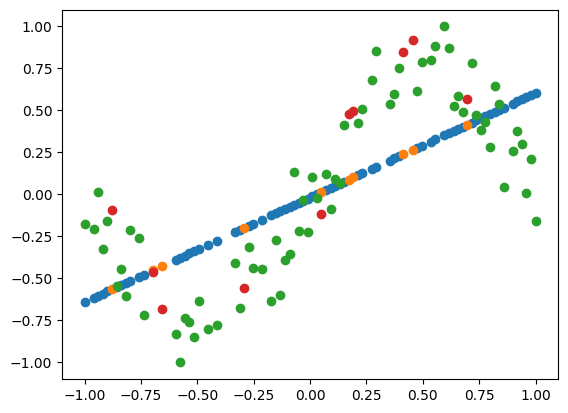

Scores saved as sine/0.7_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.03331112861633301 seconds. 
Now scoring model... 


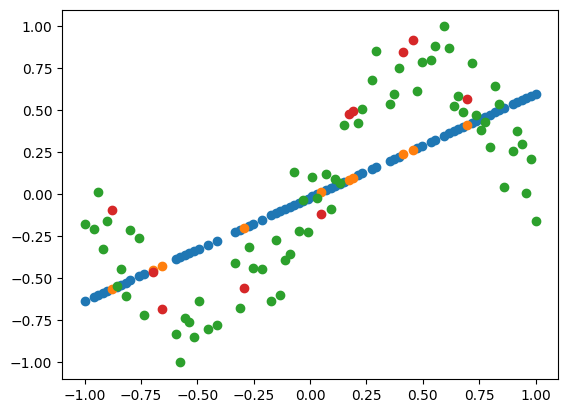

Scores saved as sine/0.7_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.040171146392822266 seconds. 
Now scoring model... 


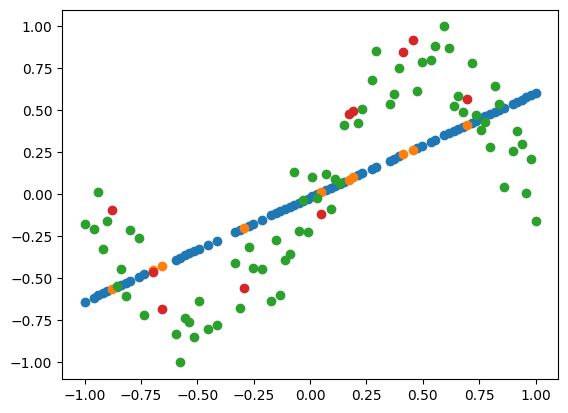

Scores saved as sine/0.7_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.029175758361816406 seconds. 
Now scoring model... 


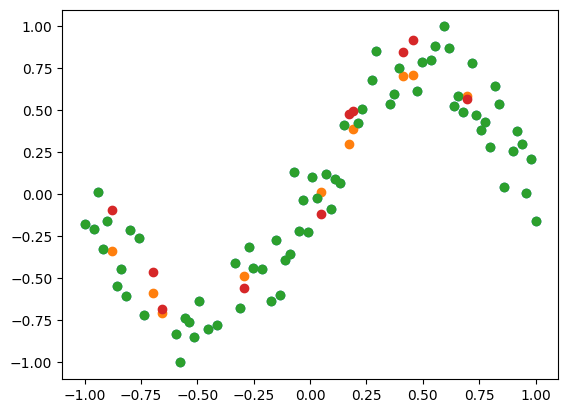

Scores saved as sine/0.7_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3968791961669922 seconds. 
Now scoring model... 


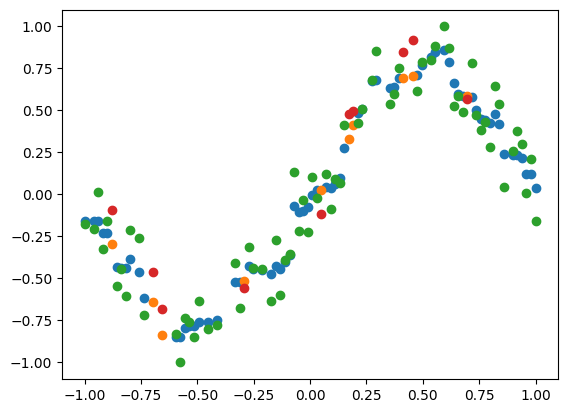

Scores saved as sine/0.7_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.6393229961395264 seconds. 
Now scoring model... 


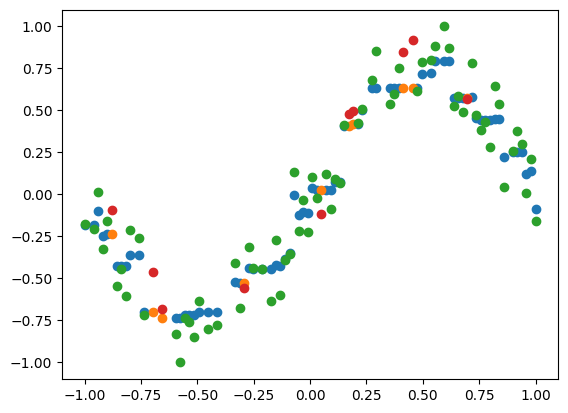

Scores saved as sine/0.7_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.025510787963867188 seconds. 
Now scoring model... 


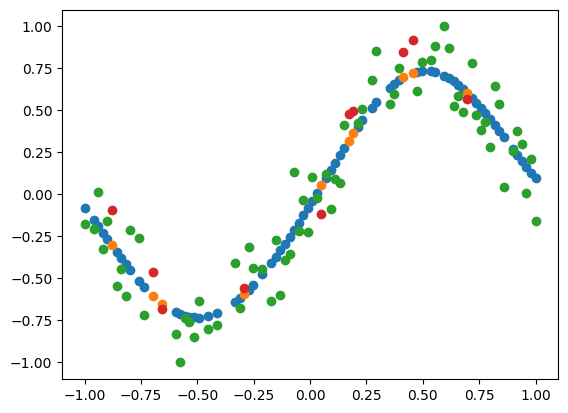

Scores saved as sine/0.7_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.07712888717651367 seconds. 
Now scoring model... 


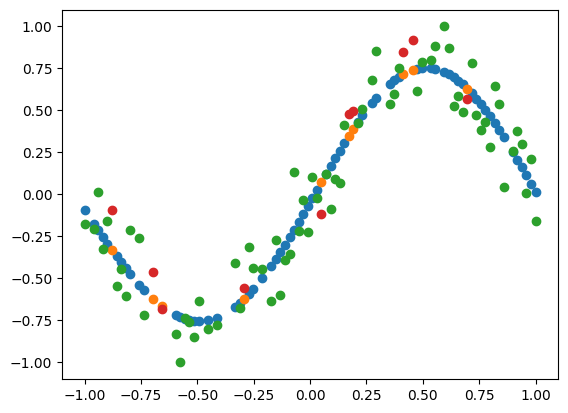

Scores saved as sine/0.7_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.17645478248596191 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

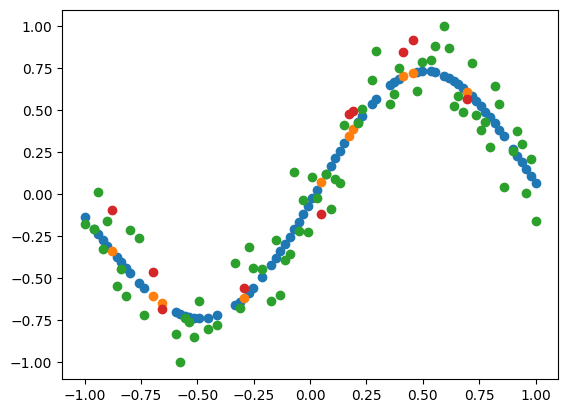

Scores saved as sine/0.7_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.08464908599853516 seconds. 
Now scoring model... 


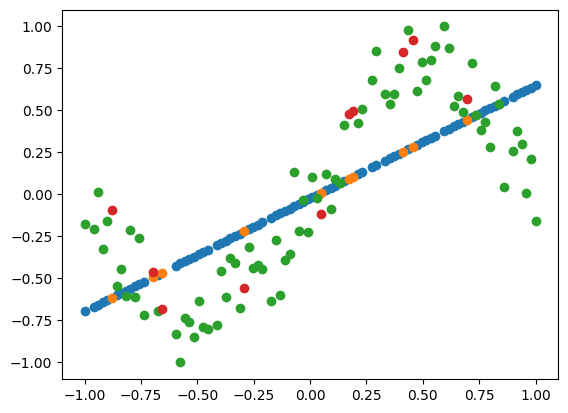

Scores saved as sine/0.8_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.039380788803100586 seconds. 
Now scoring model... 


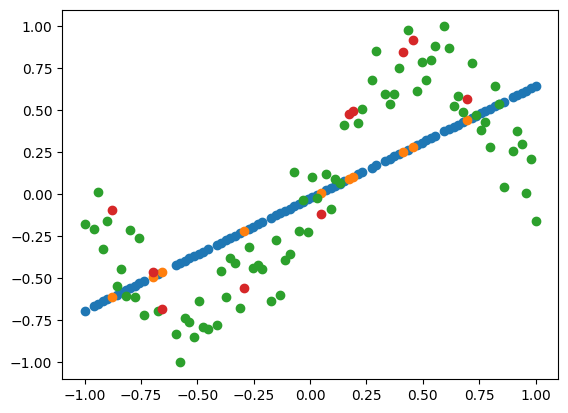

Scores saved as sine/0.8_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.0400390625 seconds. 
Now scoring model... 


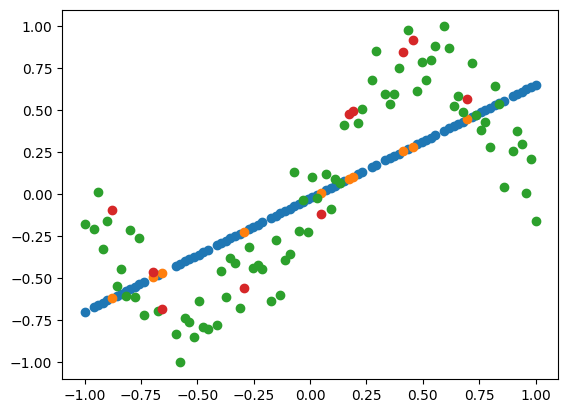

Scores saved as sine/0.8_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.027259111404418945 seconds. 
Now scoring model... 


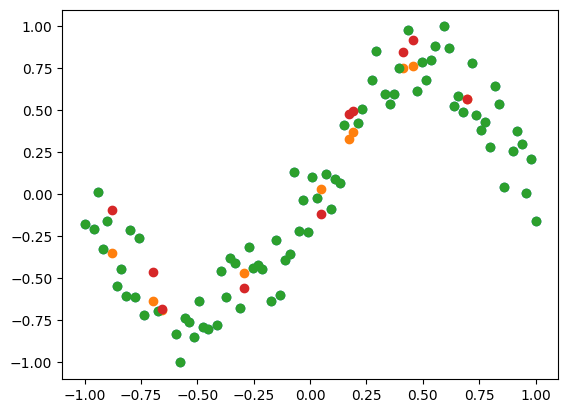

Scores saved as sine/0.8_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.4142990112304688 seconds. 
Now scoring model... 


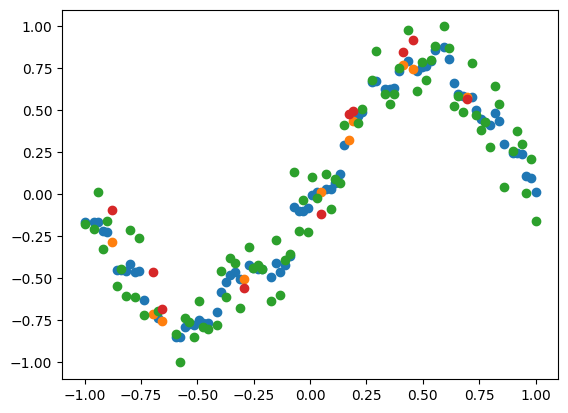

Scores saved as sine/0.8_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.6493651866912842 seconds. 
Now scoring model... 


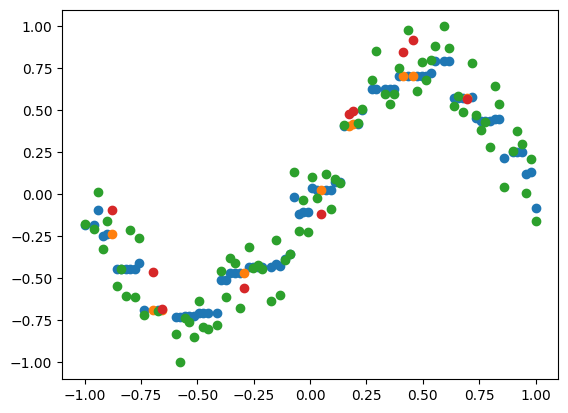

Scores saved as sine/0.8_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.027173995971679688 seconds. 
Now scoring model... 


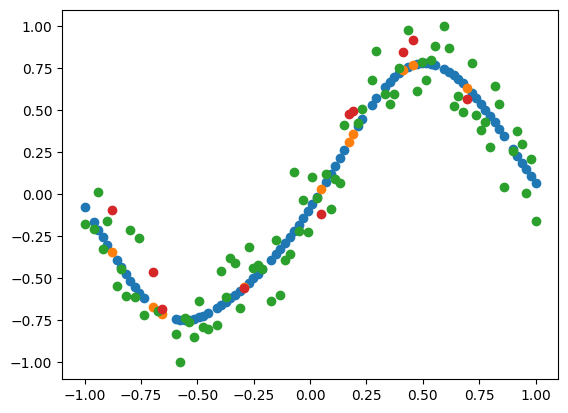

Scores saved as sine/0.8_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.060916900634765625 seconds. 
Now scoring model... 


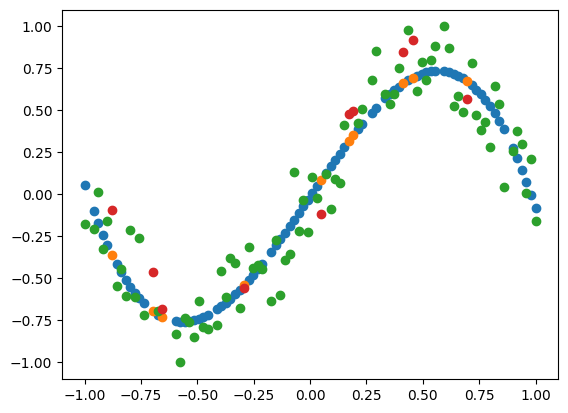

Scores saved as sine/0.8_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.1768169403076172 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/lib/python3.12/site-packag

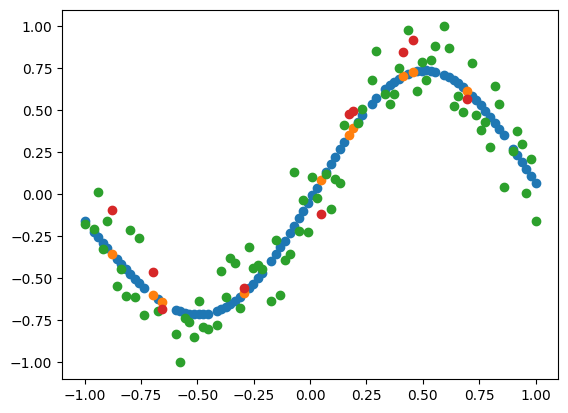

Scores saved as sine/0.8_gpr_scores.json. 


In [8]:
# Loop over function dirs and training set sizes 
# At the end of the loop save the scores
performance={}
for d in tqdm(dirs):
    performance[d]={}
    for ts in tqdm(trainsize):
        
        if ts==0.8:
            trainpath=f"/Users/grierjones/qregress/function-calc-test/{d}/{d}_train.bin"
        else:
            trainpath=f"/Users/grierjones/qregress/function-calc-test/{d}/{ts}_{d}_train.bin"
            
        with open(f"/Users/grierjones/qregress/function-calc-test/{d}/{d}_test.bin",'rb') as f:
            testdata=joblib.load(f)
            
        if os.path.exists(trainpath):
            with open(trainpath,'rb') as f:
                traindata=joblib.load(f)
                
        X_train=traindata['X'].reshape(-1,1)
        y_train=traindata['y'].reshape(-1,)
        X_test=testdata['X'].reshape(-1,1)
        y_test=testdata['y'].reshape(-1,)       

        performance[d][ts]={}
        for model in models.keys():
            scores=gridsearch(model,X_train, y_train,X_test,y_test)
            performance[d][ts][model]=scores

            # Save scores to json
            with open(os.path.join(d,f"{ts}_{model}_scores.json"), 'w') as outfile:
                json.dump(scores, outfile)
                print(f'Scores saved as {outfile.name}. ')

# Help determine best machine learning models

In [9]:
def find_best(function):
    """
    Parameters
    ----------
    function: str

    returns
    -------
    best: tuple
        (model, count)
    """
    dfmelt=[]
    for k,v in performance[function].items():
        df=pd.DataFrame.from_dict(v).loc[['R2_train','R2_test']].T
        df.columns=[df.columns,[k,k]]
        dfmelt.append(df.melt(value_vars=df.columns.tolist(),ignore_index=False))
    dfmelt=pd.concat(dfmelt)
    
    pivottable=dfmelt.reset_index().pivot_table(index=['index','variable_1'], columns='variable_0').astype(float).T
    
    stackedstats=[]
    for c in pivottable.columns.levels[0]:
        dsc=pivottable[c].T.describe().loc[['mean','min','max']]
        dsc=dsc.rename(columns={'value':c})
        stackedstats.append(dsc.T.mean().to_frame().rename(columns={0:c}))
    stackedstats=pd.concat(stackedstats,axis=1)
    
    best=stackedstats.T.idxmax()

    return best

In [10]:
bestdf=pd.DataFrame.from_dict({k: find_best(k) for k,v in performance.items()}).sort_index()

In [11]:
bestdf

quadratic linear sine
max        svr    knn  knn
mean       krr    knn  knn
min        krr    knn  svr

In [12]:
bestdf.to_excel('best.xlsx')

In [13]:
def save_bar(name):
    meltdef=[]
    for k,v in performance[name].items():
        for k1,v1 in v.items():
            for k2,v2 in v1.items():
                if "R2" in k2:
                    meltdef.append((k,k1,k2.replace('R2','R$^{2}$').replace('_',' '),v2))
                    
    df=pd.DataFrame(meltdef,columns=['Train','Model','Metric','Score'])
    
    g=sns.catplot(
        df, kind="bar",
        x="Train", y="Score", col="Model", hue='Metric',
        height=4, aspect=1, col_wrap=5,palette=sns.color_palette("Paired",2)
    )
    g.set_axis_labels("Training Set Ratio", "R$^{2}$")
    g.set_titles("{col_var}={col_name}")
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    g.set(ylim=(0, 1))
    g.fig.suptitle(f"{name}".capitalize())
    # plt.title(f"{name}")
    plt.tight_layout()
    plt.savefig(f'{name}.png',dpi=300,bbox_inches='tight')
    plt.show()

quadratic


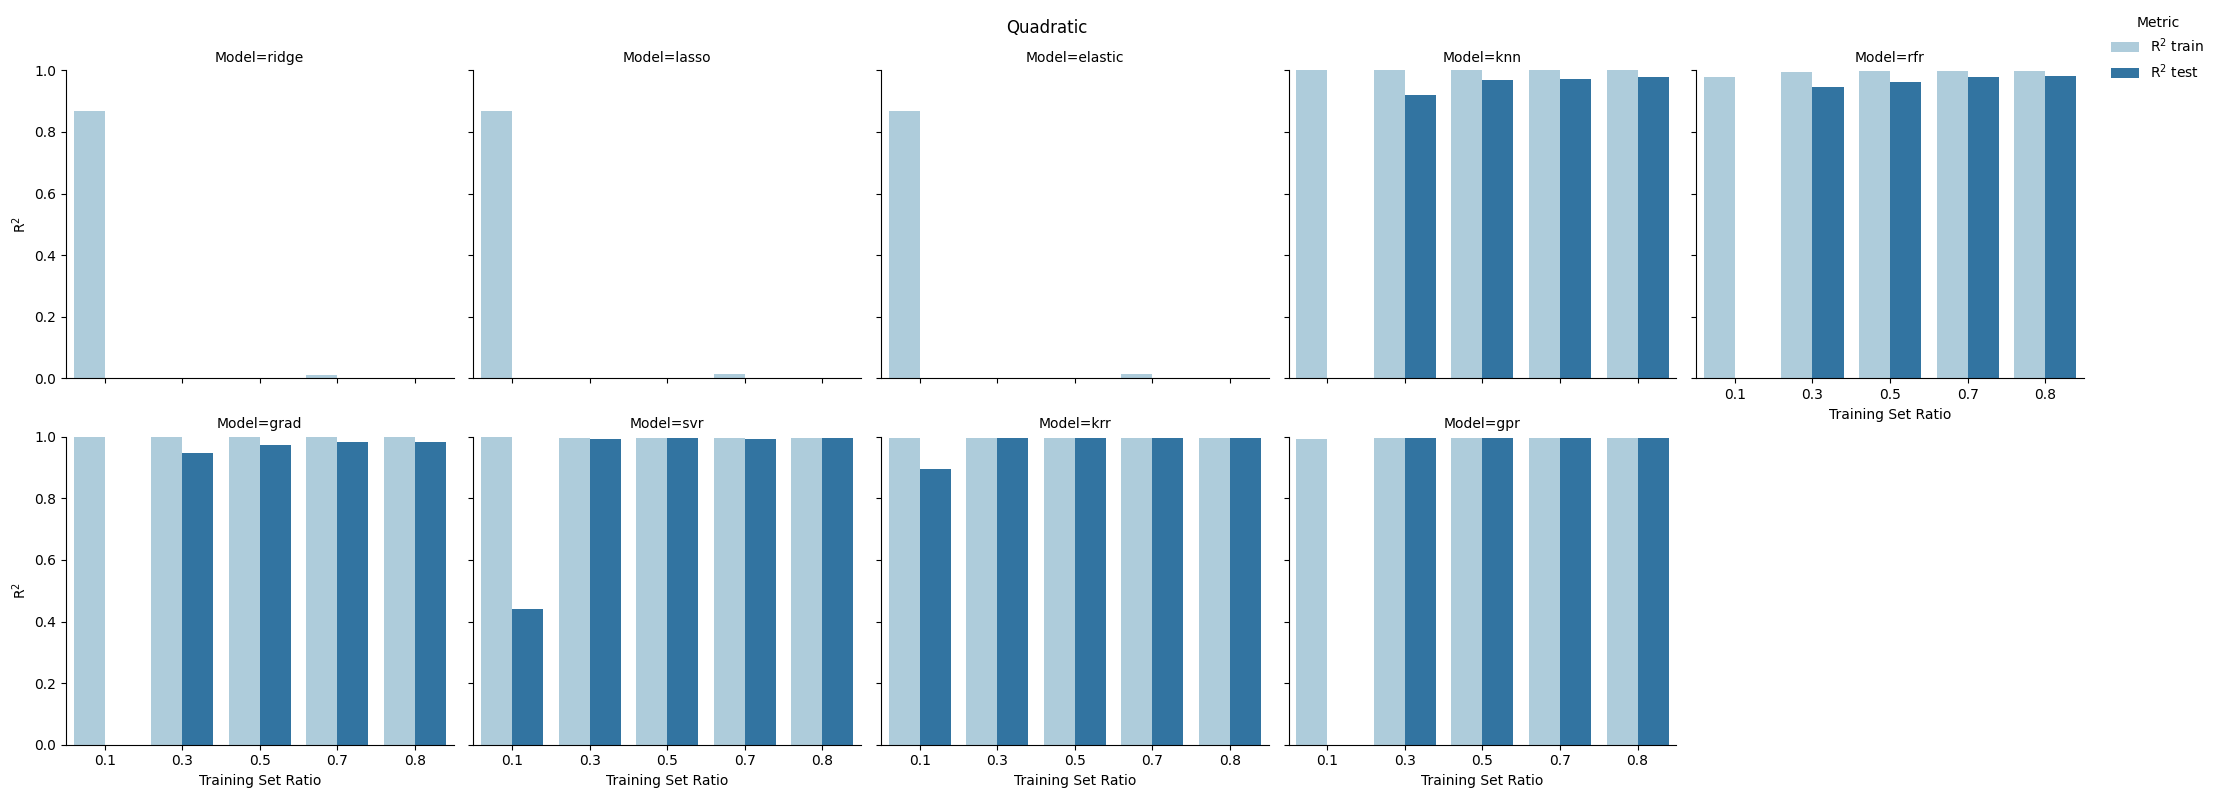

linear


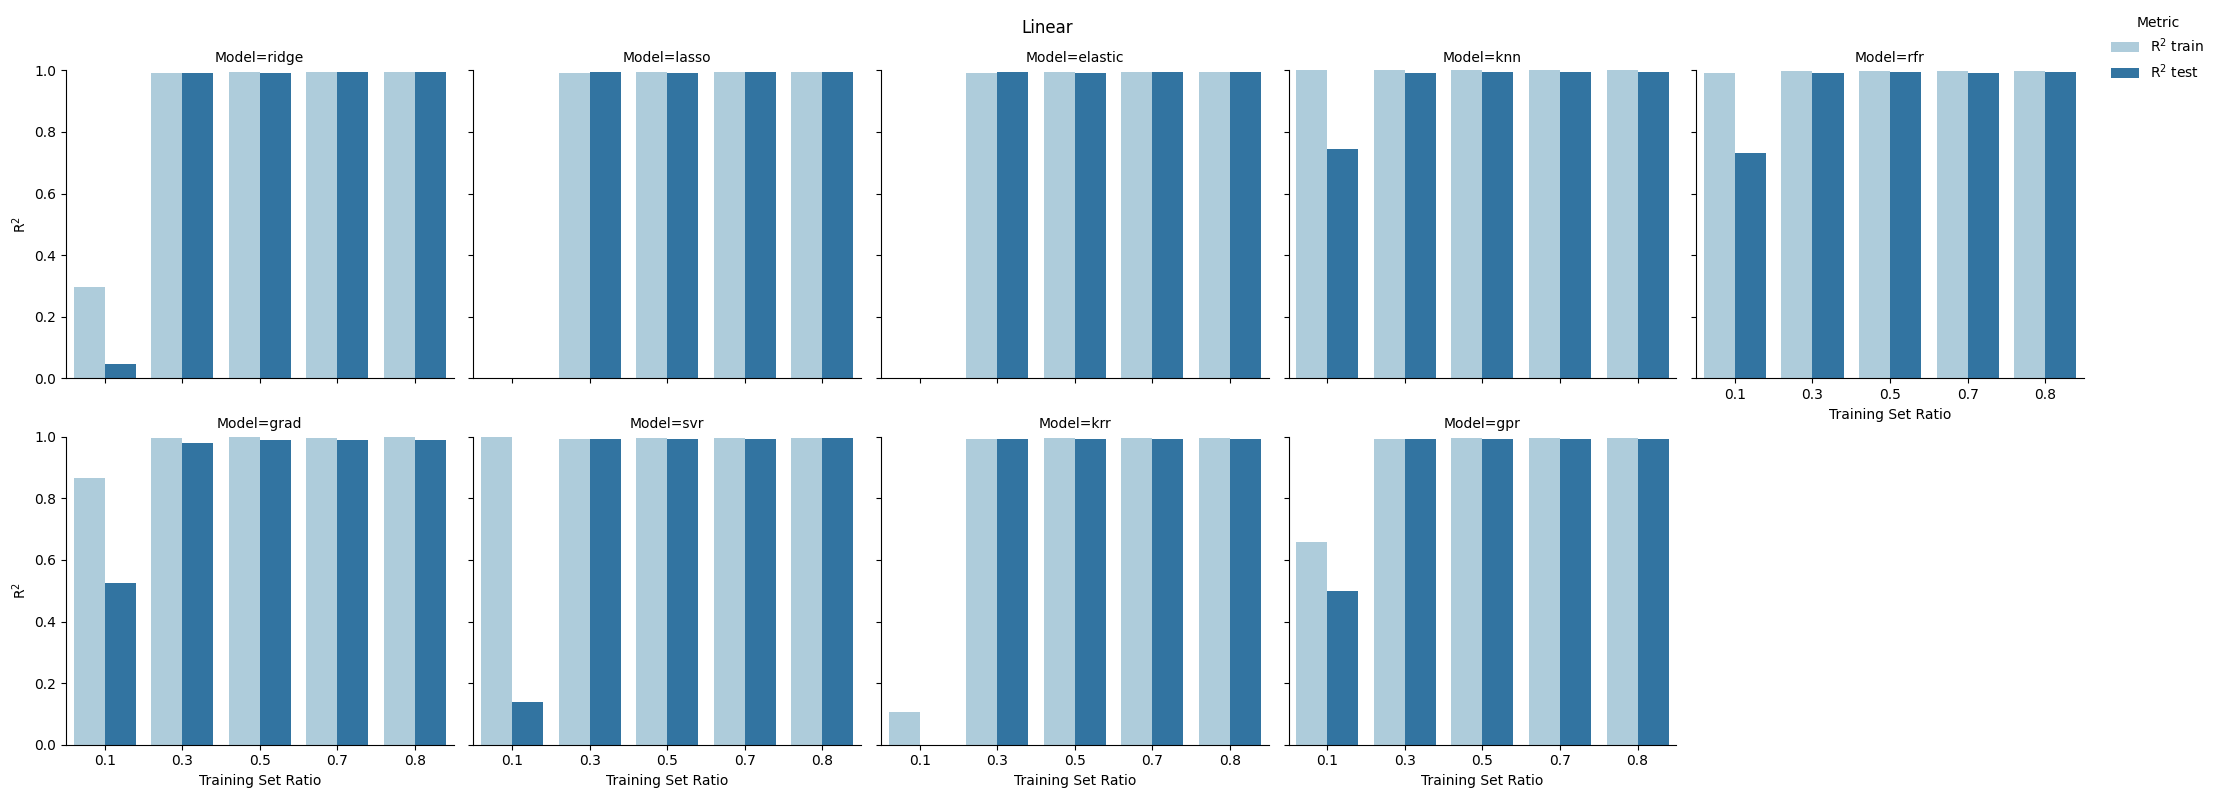

sine


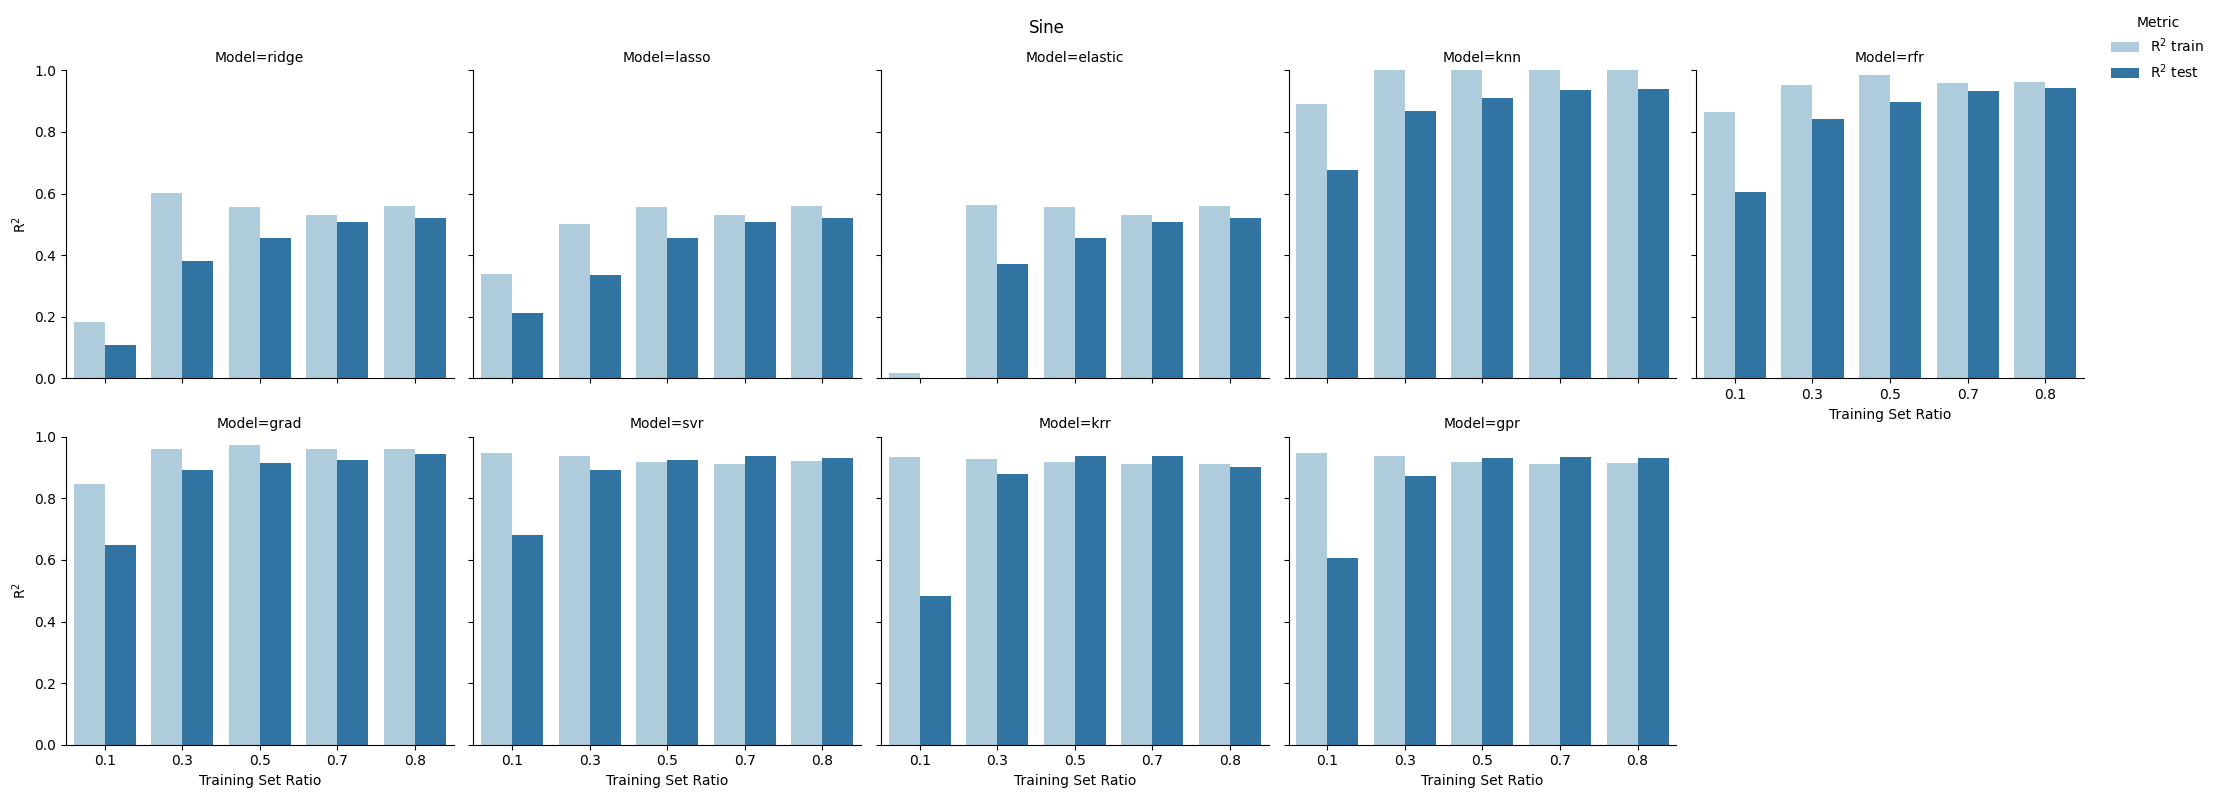

In [14]:
for i in dirs: 
    print(i)
    save_bar(i)